In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
import re
import json


modelos = ['d2v','ddne','gcngan','list','tmf','eld']

In [2]:
#Scrap baseline results

with open("fc/baseline_fc.txt", "r") as f:
        text = f.read()
# --- Regex patterns ---
snap_pattern = re.compile(r"Snapshot (\d+): ROC AUC=([\d.]+), PR AUC=([\d.]+), Acc=([\d.]+), Prec=([\d.]+), Rec=([\d.]+), F1=([\d.]+)")
class0_pattern = re.compile(r"\n\s*0\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)")
class1_pattern = re.compile(r"\n\s*1\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)")
# regresión global
global_reg_pattern = re.compile(r"Global RMSE\s*:? ([\d.]+)\s*std:\s*([\d.]+)\s*Global MAE\s*:? ([\d.]+)\s*std:\s*([\d.]+)", re.I)

# regresión por clase
class0_reg_pattern = re.compile(
    r"RMSE clase 0\s*:\s*([\d.]+),\s*MAE clase 0\s*:\s*([\d.]+)", re.I)
class1_reg_pattern = re.compile(
    r"RMSE clase 1\s*:\s*([\d.]+),\s*MAE clase 1\s*:\s*([\d.]+)", re.I)

# --- Extract global snapshot metrics ---
bs_snapshots   = []
bs_roc_auc     = []
bs_pr_auc      = []
bs_accuracy    = []
bs_precision   = []
bs_recall      = []
bs_f1_score    = []

# --- Extract class metrics ---
bs_c0_precision = []
bs_c0_recall    = []
bs_c0_f1        = []
bs_c1_precision = []
bs_c1_recall    = []
bs_c1_f1        = []
bs_rmse       = []
bs_rmse_std  = []
bs_mae       = []
bs_mae_std   = []
bs_c0_rmse   = []
bs_c0_mae    = []
bs_c1_rmse   = []
bs_c1_mae    = []


snap_matches = snap_pattern.findall(text)
class0_matches = class0_pattern.findall(text)
class1_matches = class1_pattern.findall(text)
global_reg     = global_reg_pattern.findall(text)
class0_reg     = class0_reg_pattern.findall(text)
class1_reg     = class1_reg_pattern.findall(text)


for i, m in enumerate(snap_matches):
    snap, roc, pr, acc, prec, rec, f1 = m
    bs_snapshots.append(int(snap) - 21)  
    bs_roc_auc.append(float(roc))
    bs_pr_auc.append(float(pr))
    bs_accuracy.append(float(acc))
    bs_precision.append(float(prec))
    bs_recall.append(float(rec))
    bs_f1_score.append(float(f1))

    # Clases
    c0p, c0r, c0f = class0_matches[i]
    c1p, c1r, c1f = class1_matches[i]

    bs_c0_precision.append(float(c0p))
    bs_c0_recall.append(float(c0r))
    bs_c0_f1.append(float(c0f))

    bs_c1_precision.append(float(c1p))
    bs_c1_recall.append(float(c1r))
    bs_c1_f1.append(float(c1f))
    # Regresión global
    g_rmse, g_rmse_std, g_mae, g_mae_std = global_reg[i]
    bs_rmse.append(float(g_rmse))
    bs_rmse_std.append(float(g_rmse_std))
    bs_mae.append(float(g_mae))
    bs_mae_std.append(float(g_mae_std))

    # Regresión por clase
    c0_rmse, c0_mae_ = class0_reg[i]
    c1_rmse, c1_mae_ = class1_reg[i]
    bs_c0_rmse.append(float(c0_rmse))
    bs_c0_mae.append(float(c0_mae_))
    bs_c1_rmse.append(float(c1_rmse))
    bs_c1_mae.append(float(c1_mae_))


print("bs_snapshots   =", bs_snapshots)
print("bs_roc_auc     =", bs_roc_auc)
print("bs_pr_auc      =", bs_pr_auc)
print("bs_accuracy    =", bs_accuracy)
print("bs_precision   =", bs_precision)
print("bs_recall      =", bs_recall)
print("bs_f1_score    =", bs_f1_score)

print("bs_c1_precision =", bs_c1_precision)
print("bs_c1_recall    =", bs_c1_recall)
print("bs_c1_f1        =", bs_c1_f1)

print("bs_c0_precision =", bs_c0_precision)
print("bs_c0_recall    =", bs_c0_recall)
print("bs_c0_f1        =", bs_c0_f1)


bs_snapshots   = [1, 2, 3, 4, 5, 6]
bs_roc_auc     = [0.969, 0.957, 0.951, 0.946, 0.938, 0.931]
bs_pr_auc      = [0.886, 0.843, 0.815, 0.791, 0.768, 0.74]
bs_accuracy    = [0.963, 0.953, 0.947, 0.941, 0.936, 0.93]
bs_precision   = [0.871, 0.836, 0.813, 0.784, 0.767, 0.742]
bs_recall      = [0.861, 0.826, 0.809, 0.793, 0.771, 0.75]
bs_f1_score    = [0.866, 0.831, 0.811, 0.788, 0.769, 0.746]
bs_c1_precision = [0.87, 0.84, 0.81, 0.78, 0.77, 0.74]
bs_c1_recall    = [0.86, 0.83, 0.81, 0.79, 0.77, 0.75]
bs_c1_f1        = [0.87, 0.83, 0.81, 0.79, 0.77, 0.75]
bs_c0_precision = [0.98, 0.97, 0.97, 0.97, 0.96, 0.96]
bs_c0_recall    = [0.98, 0.97, 0.97, 0.97, 0.96, 0.96]
bs_c0_f1        = [0.98, 0.97, 0.97, 0.97, 0.96, 0.96]


In [14]:
# Plotear todas las métricas
def plot_metric_comparison(model_name, metric_values, baseline_values, metric_name, snapshots):
    model_name = model_name.upper()
    plt.figure(figsize=(8, 5))
    plt.plot(snapshots, metric_values, marker='o', label={model_name}, linewidth=2)
    plt.plot(snapshots, baseline_values, marker='s', linestyle='--', label="Baseline", linewidth=2)
    plt.xlabel("Snapshot")
    plt.ylabel(metric_name)
    plt.title(f"{model_name}: {metric_name} por Snapshot")
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()


In [4]:
def plot_curves_from_model(model):

    filename = f"{model}_fc_curve_metrics_from_year22.json"

    with open(filename, "r") as f:
        metrics = json.load(f)

    # Extraer métricas por lista
    snapshots = bs_snapshots

    # graficar roc curve por snapshot

    roc_auc = metrics["roc_auc"]
    fprs = metrics["fpr"]
    tprs = metrics["tpr"]
    model_u = model.upper()

    for i, snapshot in enumerate(snapshots):
        plt.figure(figsize=(6, 5))
        plt.plot(fprs[i], tprs[i], label=f"Snapshot {snapshot} (AUC={roc_auc[i]:.2f})")
        plt.plot([0, 1], [0, 1], "k--", label="Random")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{model_u}: ROC Curve - Snapshot {snapshot}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    precisions = metrics["precision_curve"]
    recalls = metrics["recall_curve"]
    avg_precs = metrics["average_precision"]


    # Graficar pr curve por snapshot
    for i, snapshot in enumerate(snapshots):
        plt.figure(figsize=(6, 5))
        plt.plot(recalls[i], precisions[i], label=f"Snapshot {snapshot} (AP={avg_precs[i]:.2f})")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(f"{model_u}: Precision-Recall Curve - Snapshot {snapshot}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()



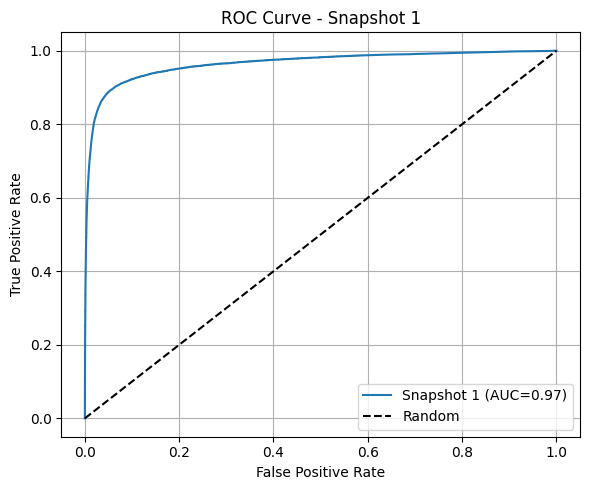

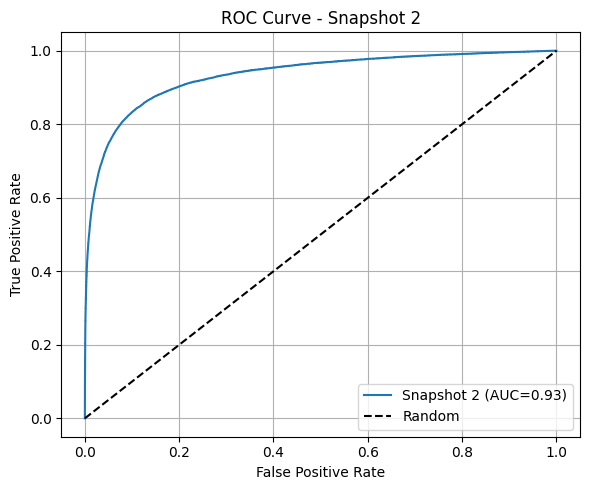

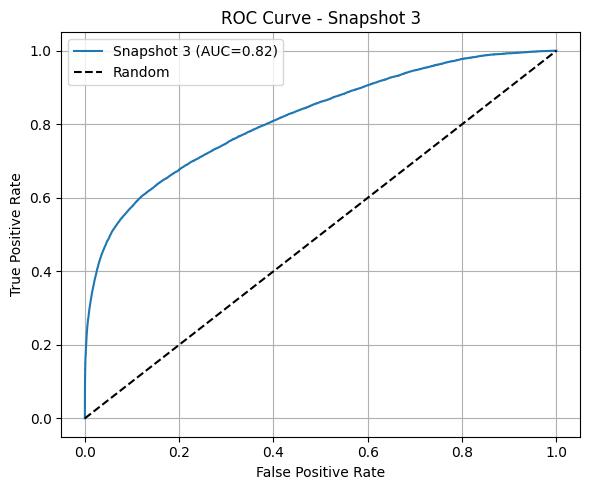

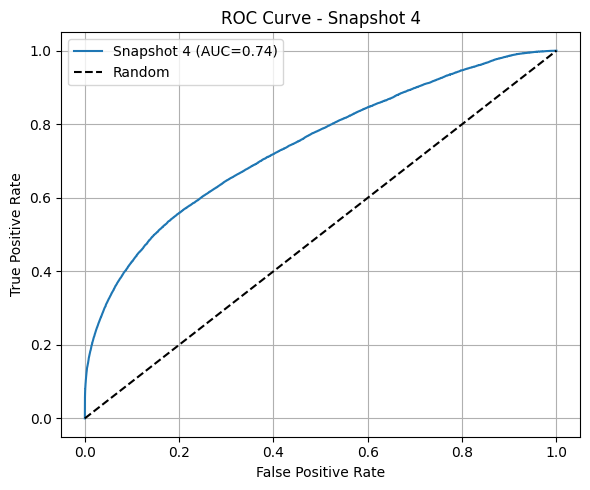

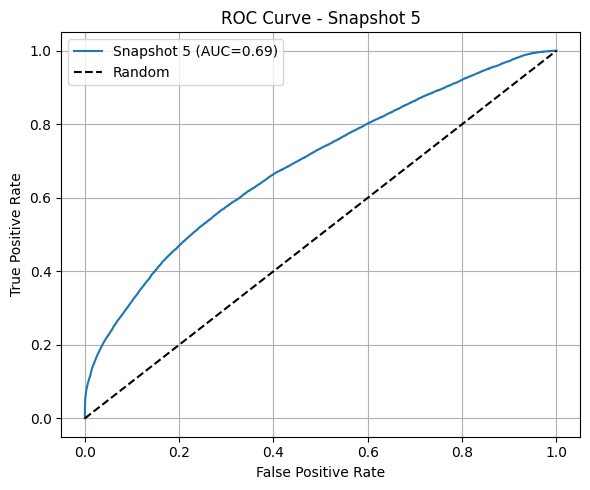

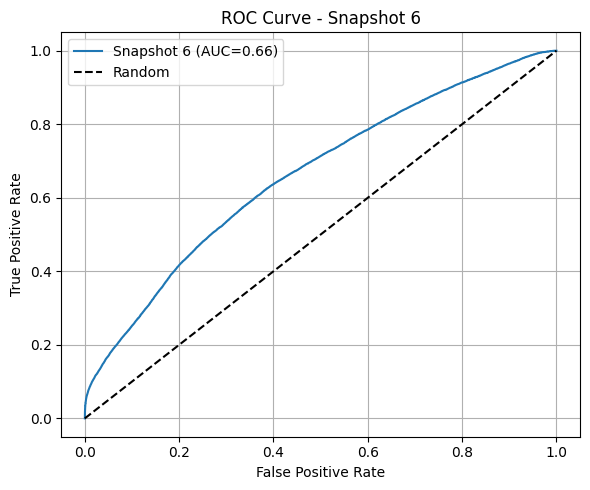

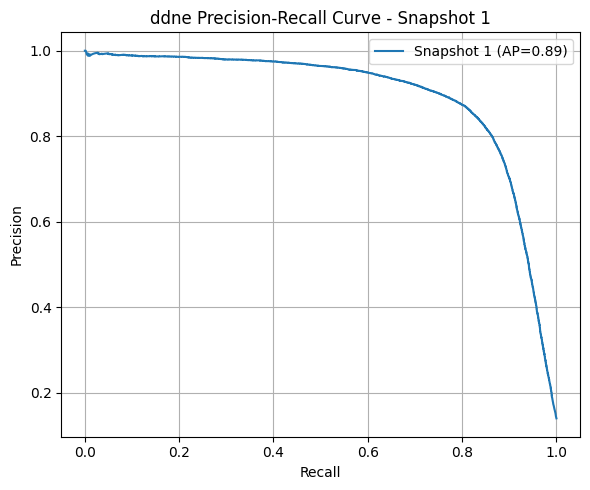

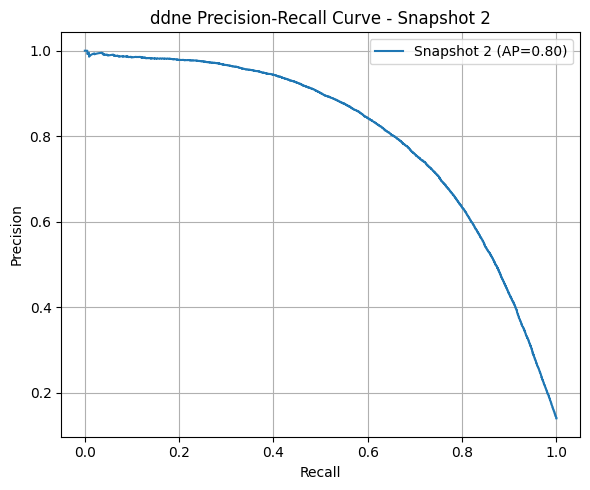

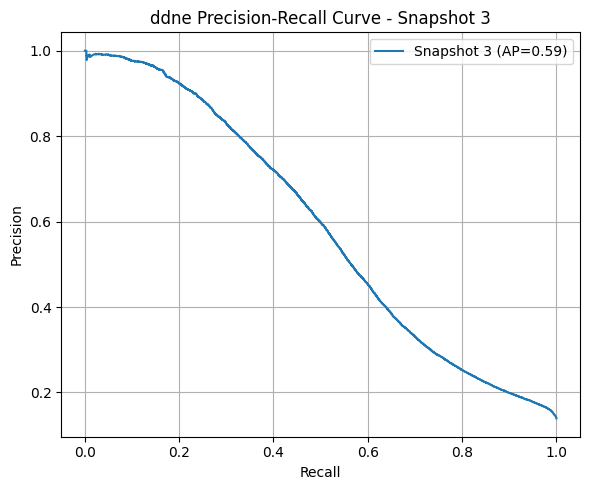

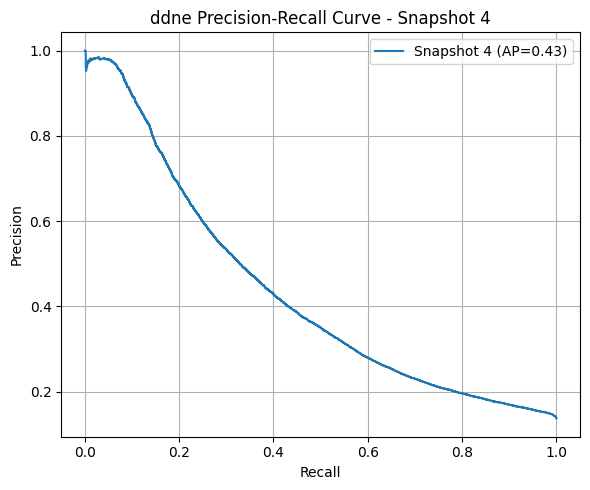

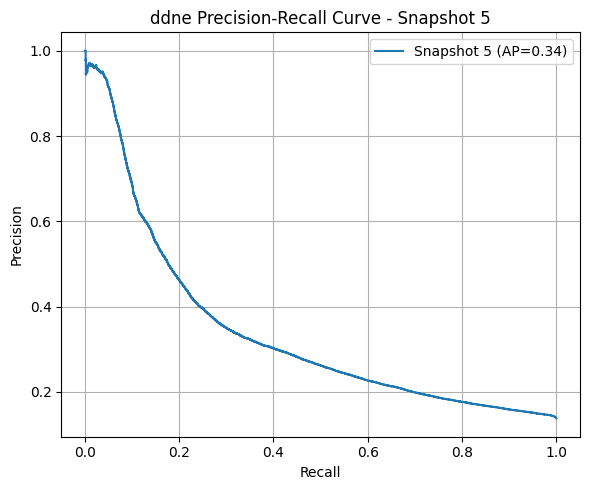

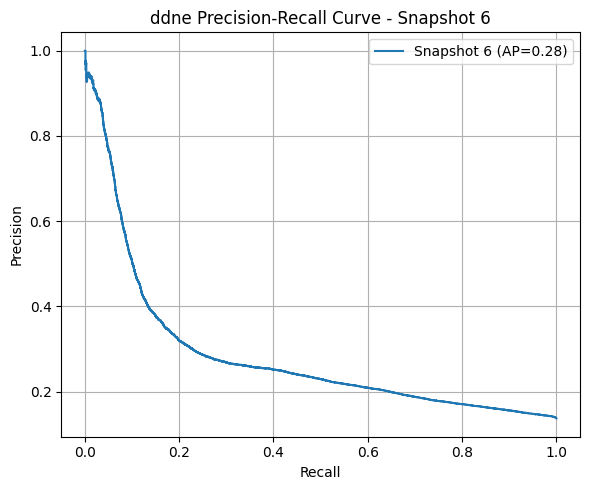

In [19]:
plot_curves_from_model("ddne")

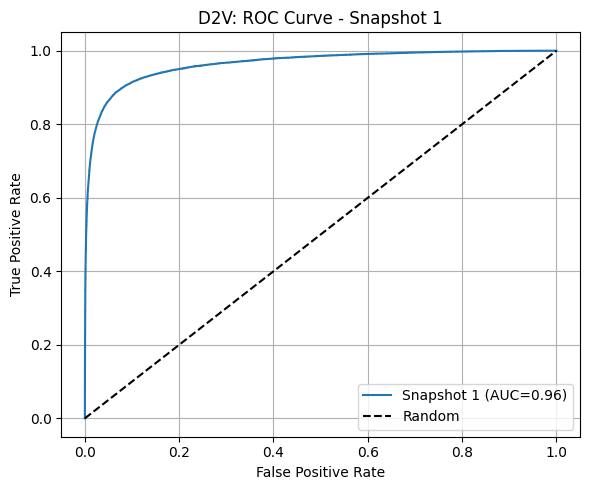

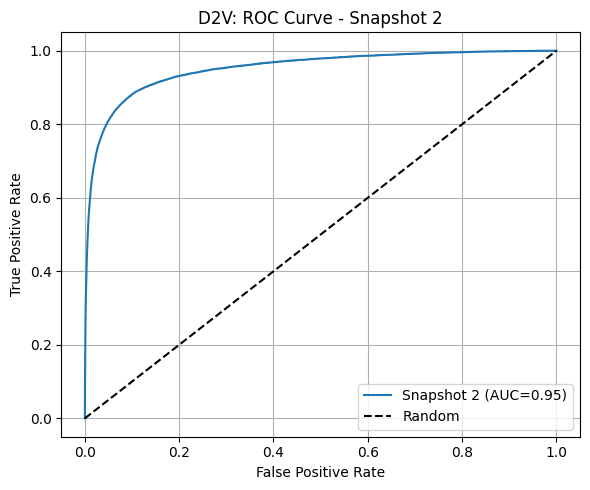

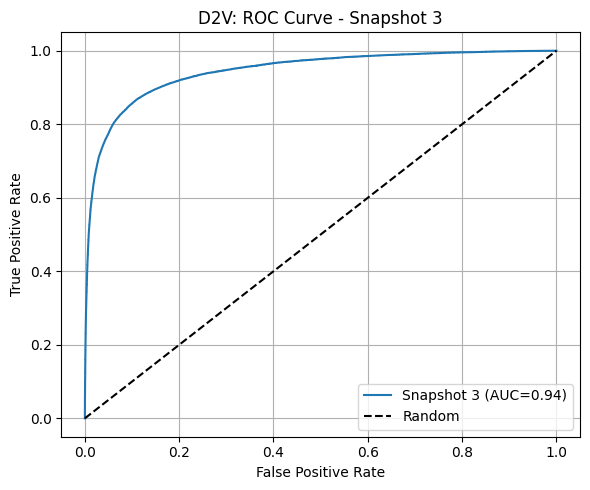

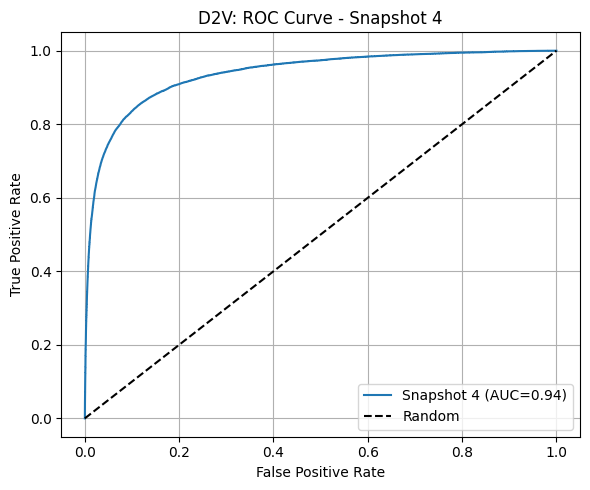

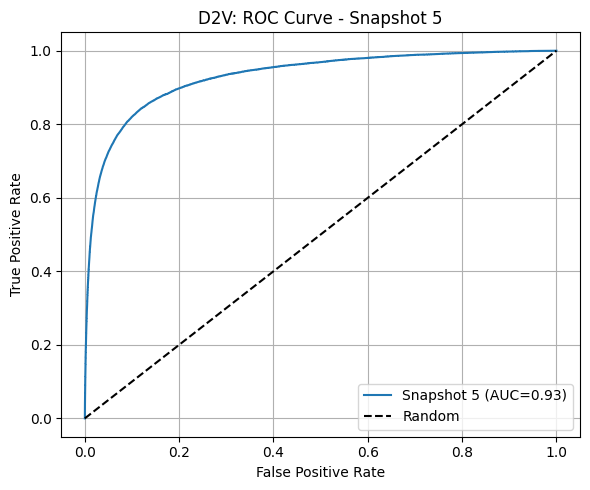

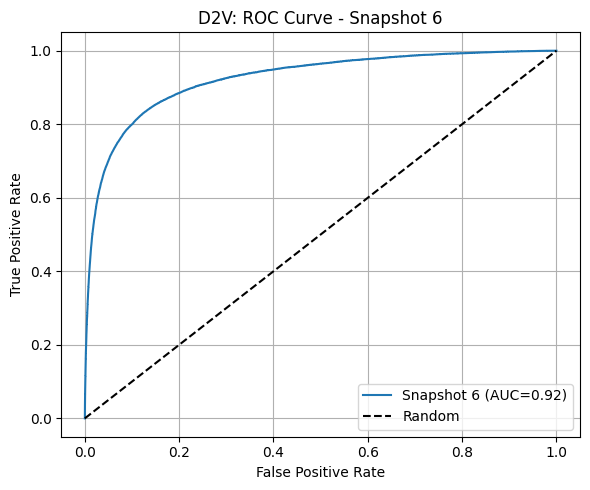

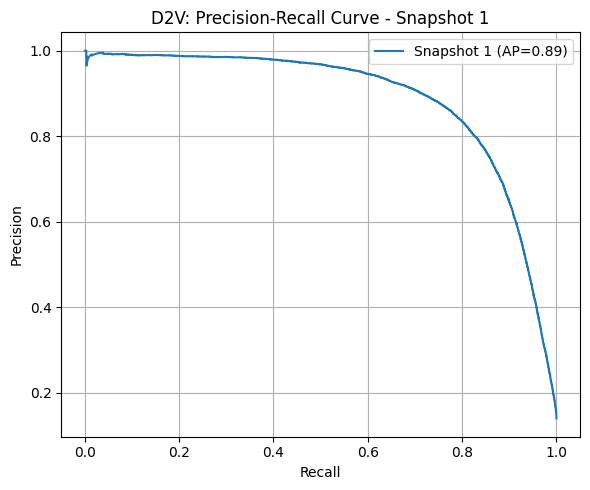

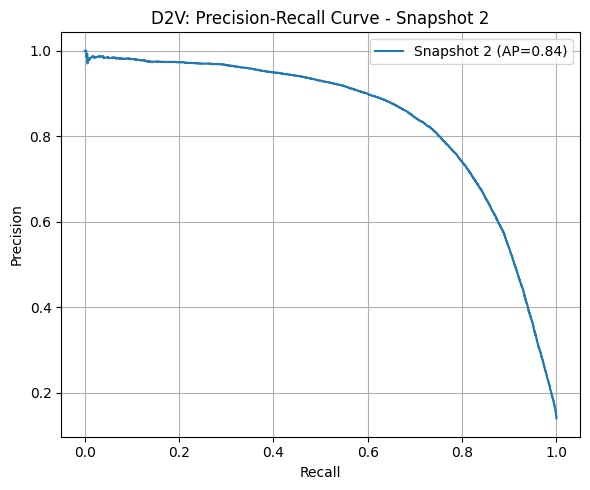

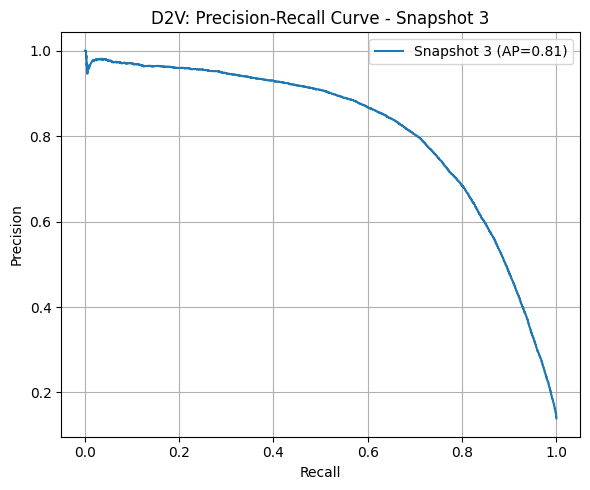

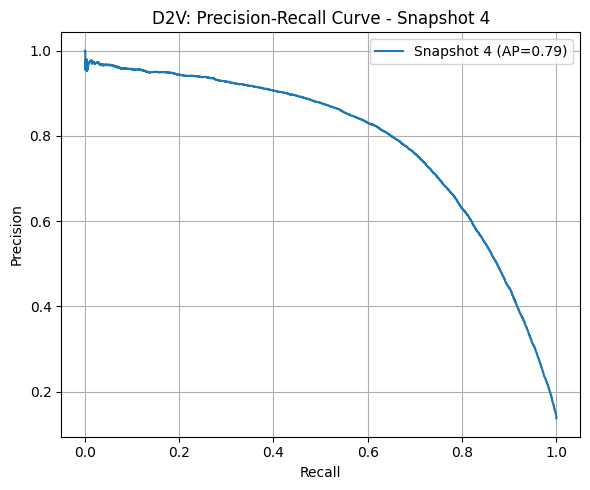

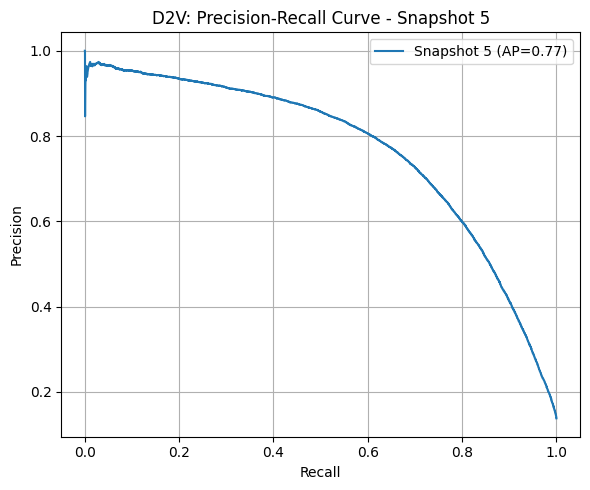

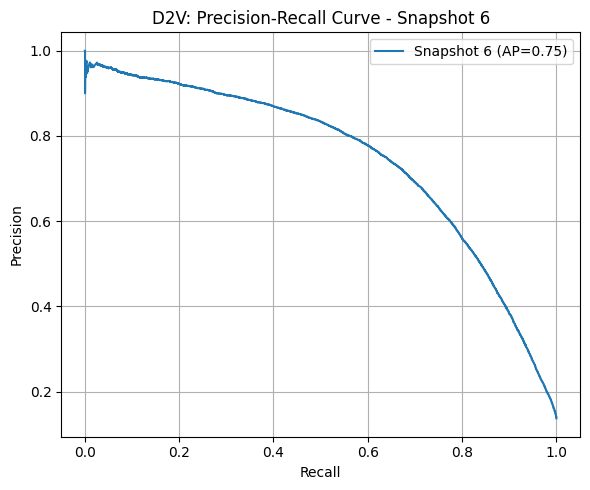

------------------------------------------------------------------


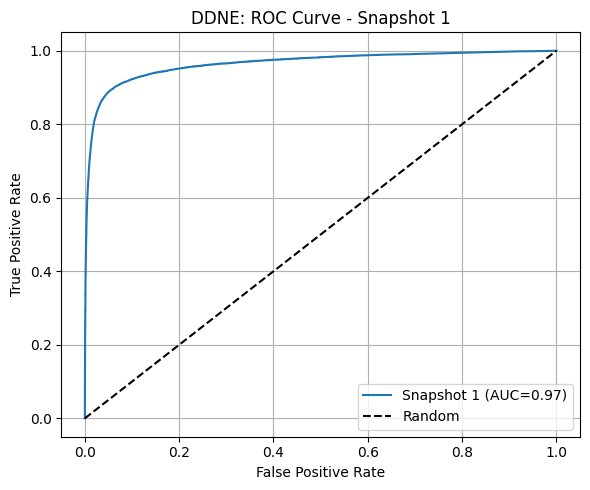

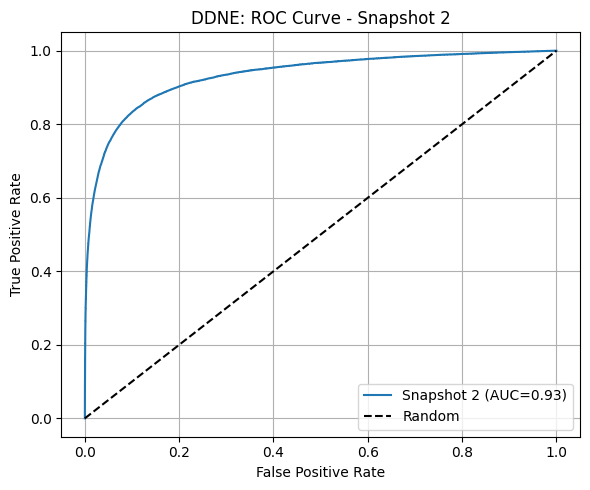

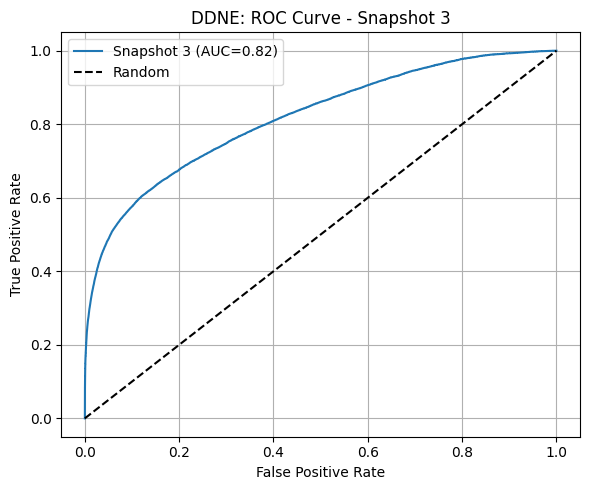

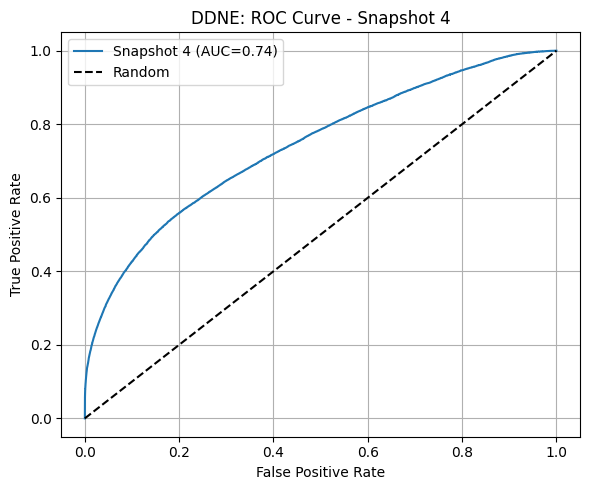

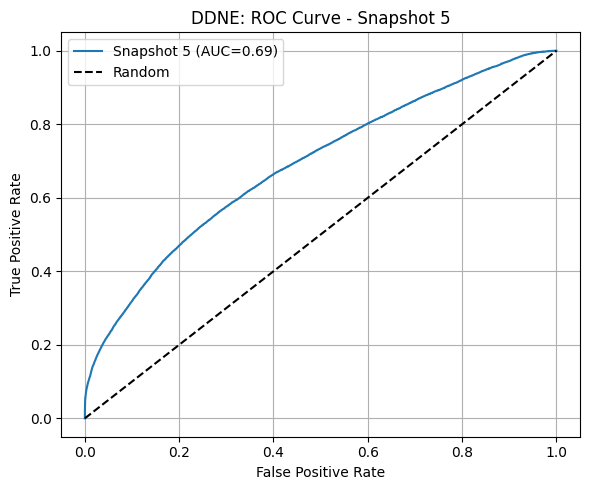

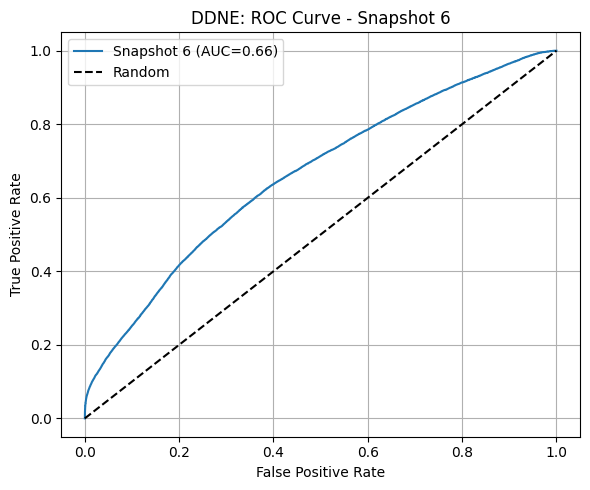

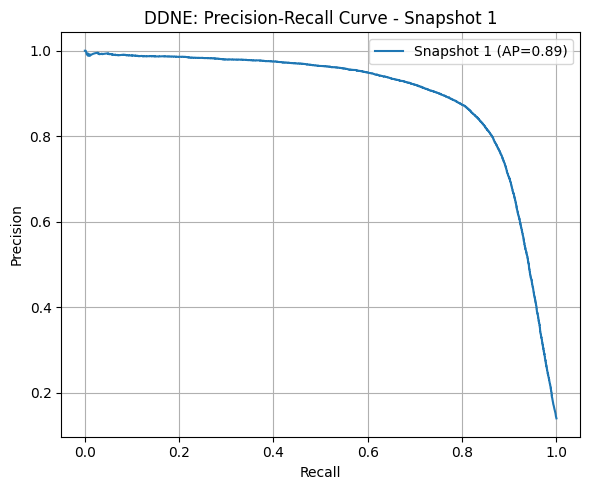

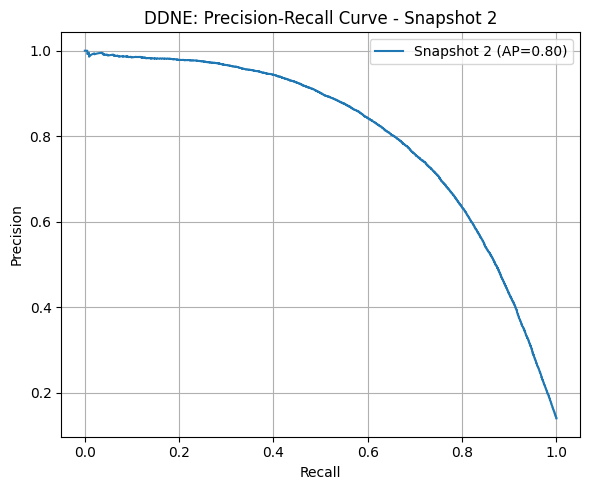

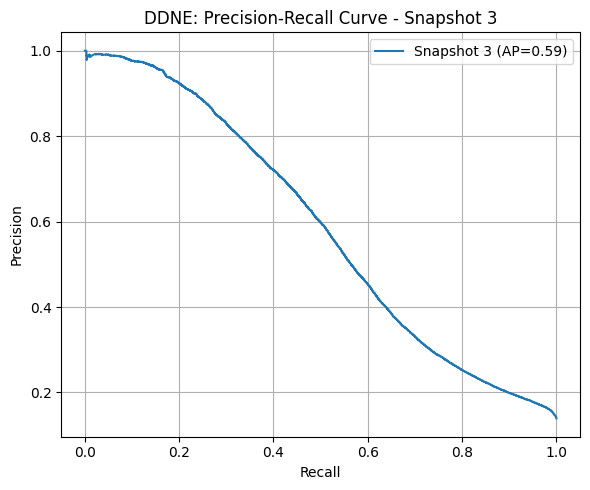

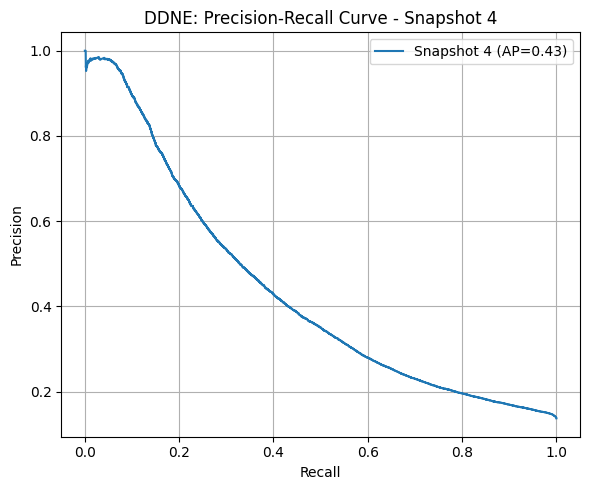

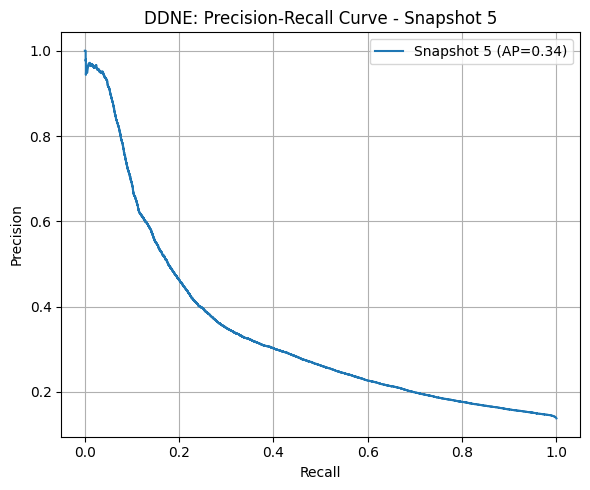

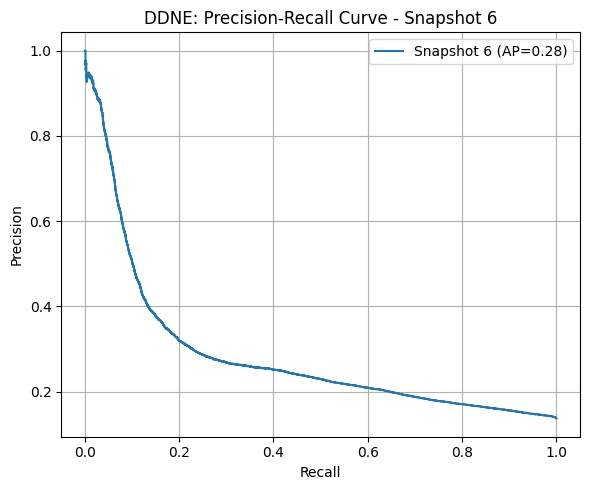

------------------------------------------------------------------


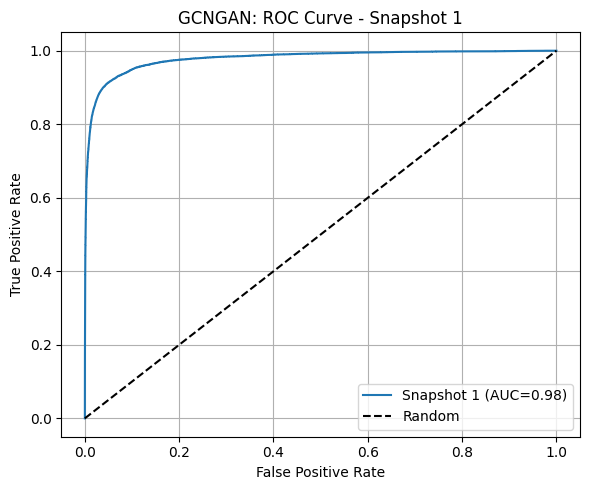

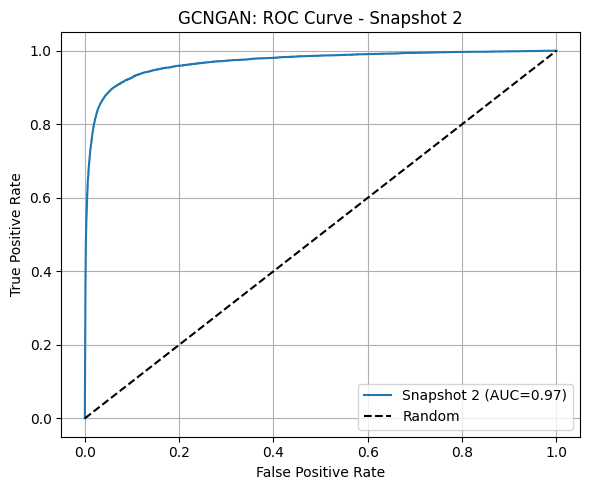

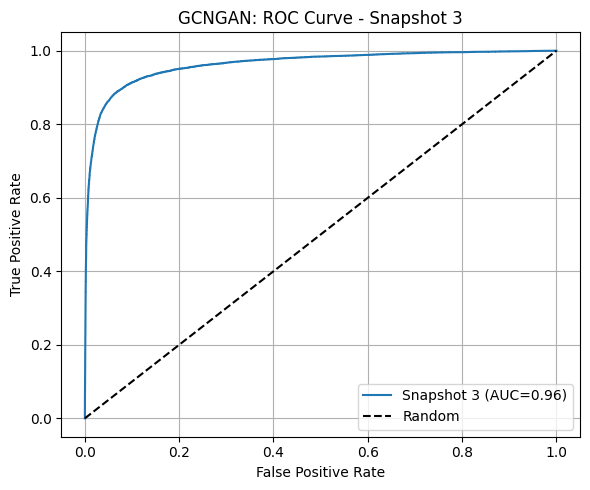

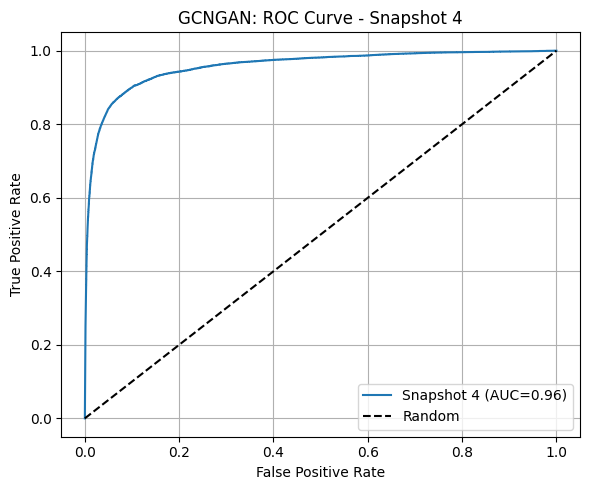

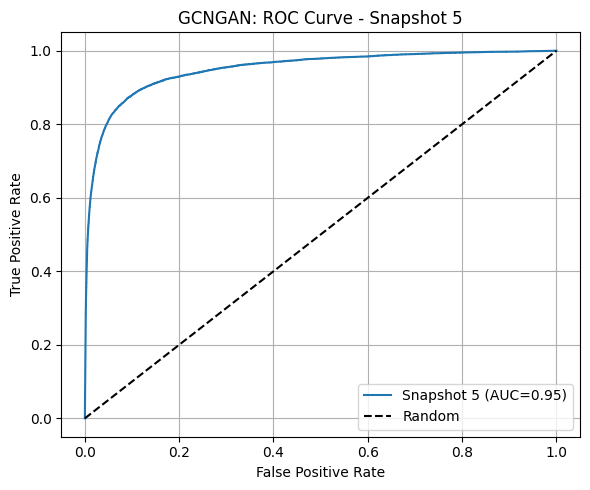

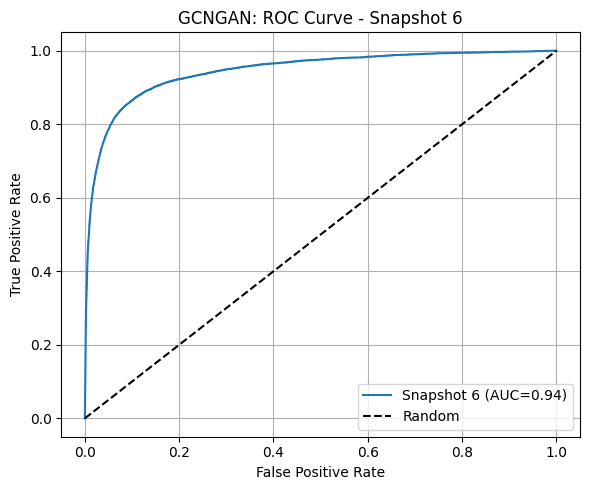

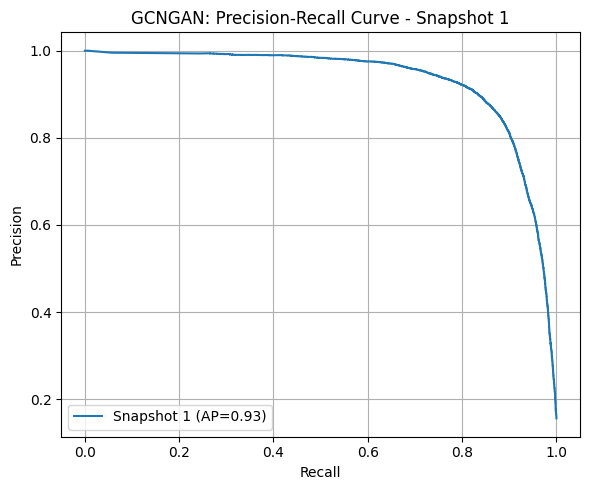

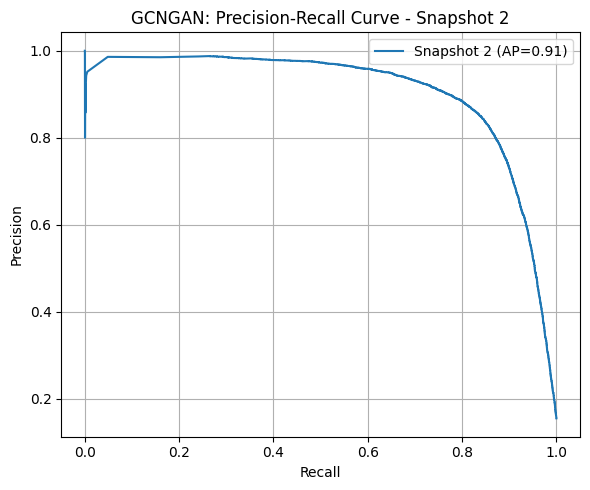

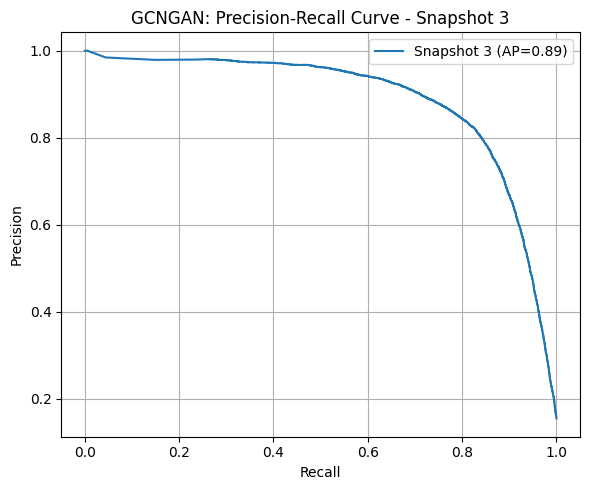

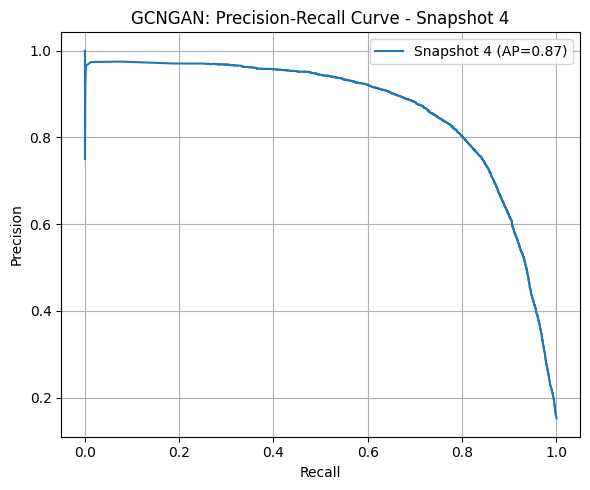

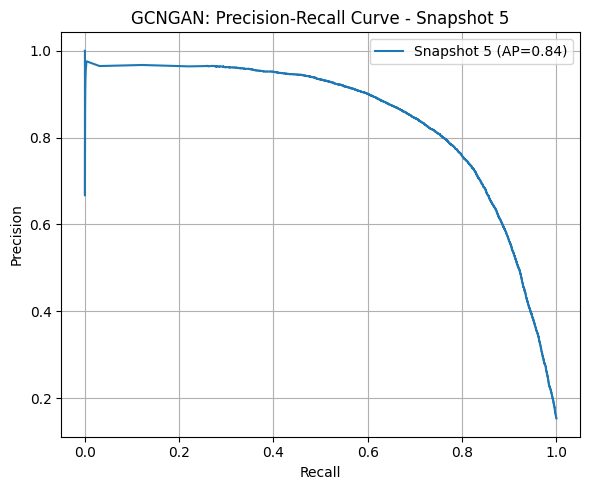

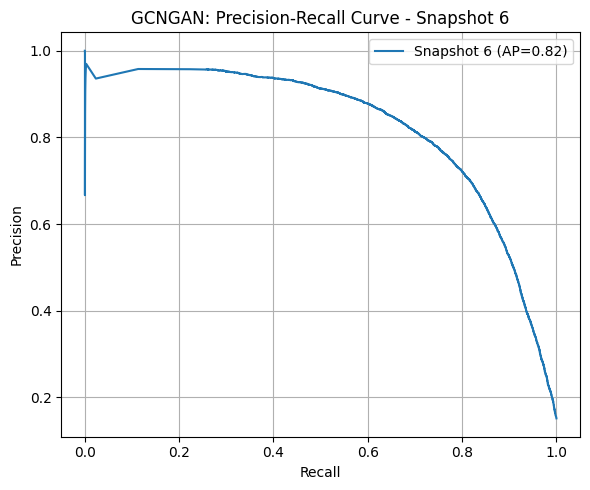

------------------------------------------------------------------


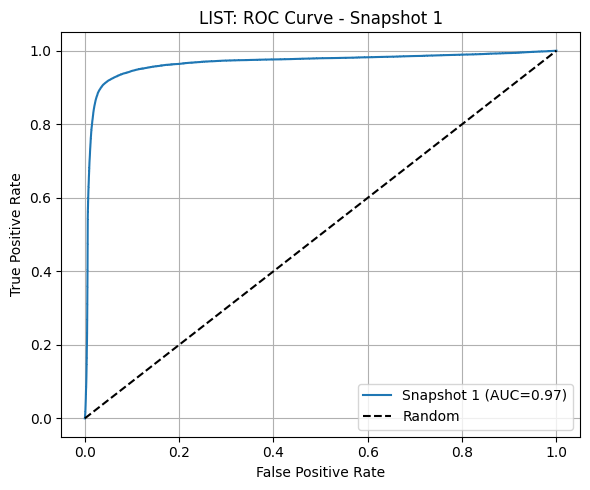

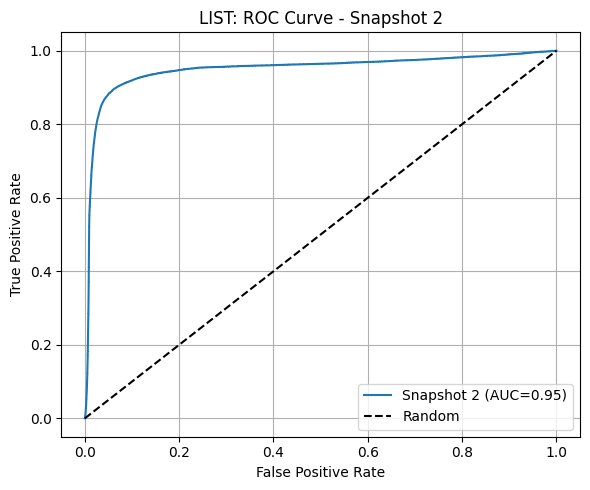

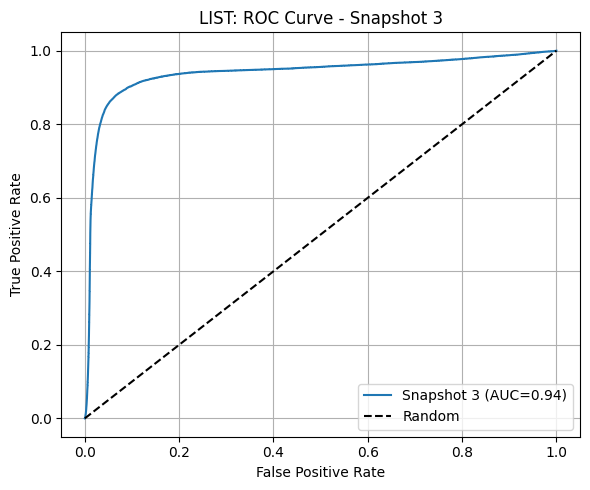

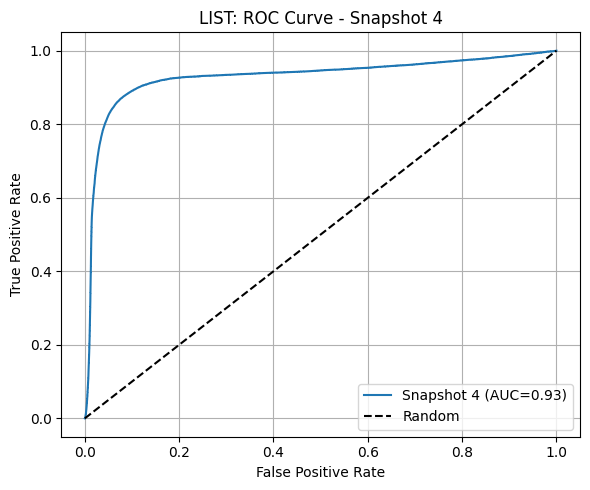

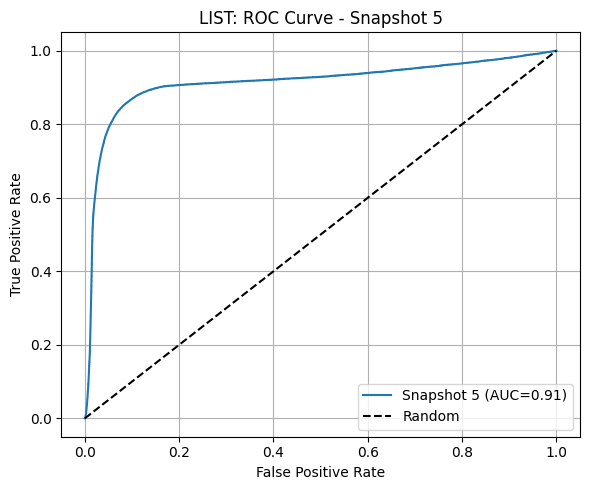

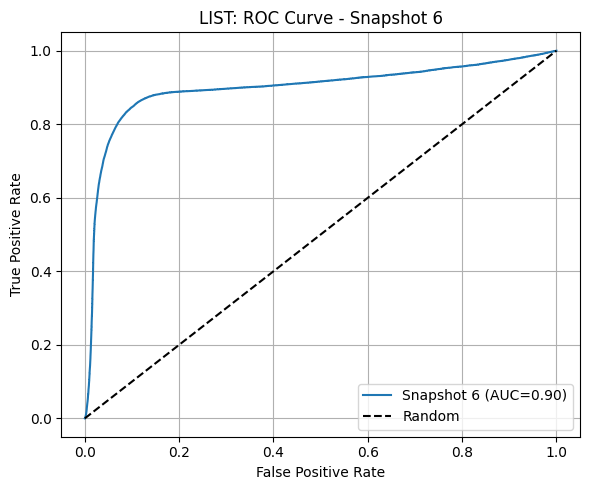

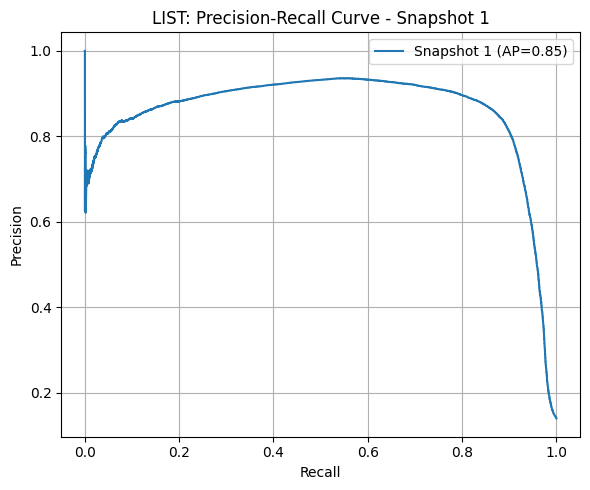

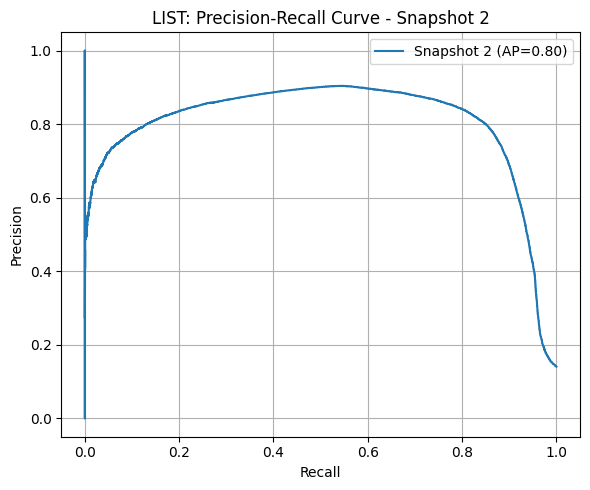

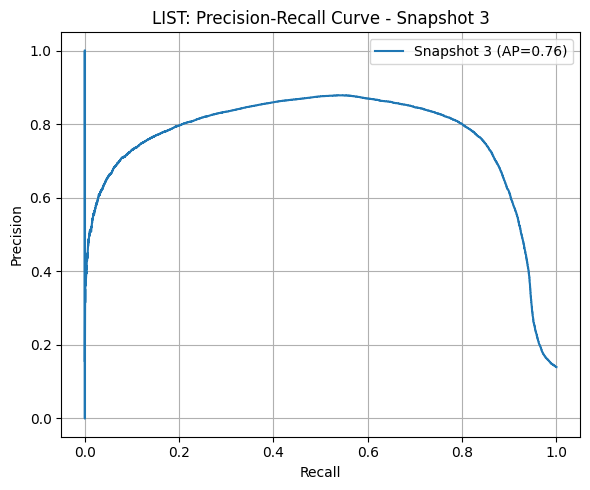

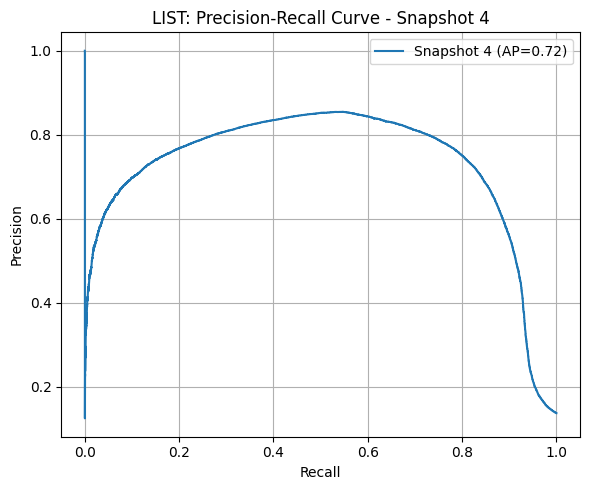

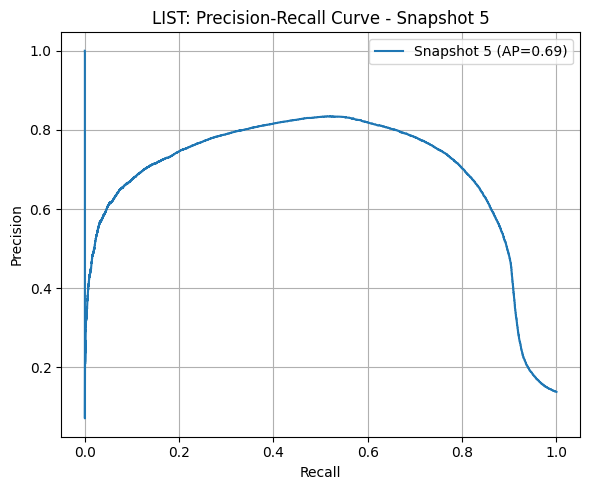

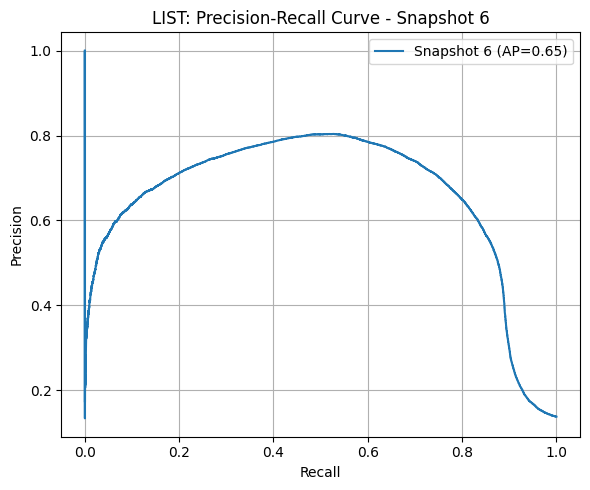

------------------------------------------------------------------


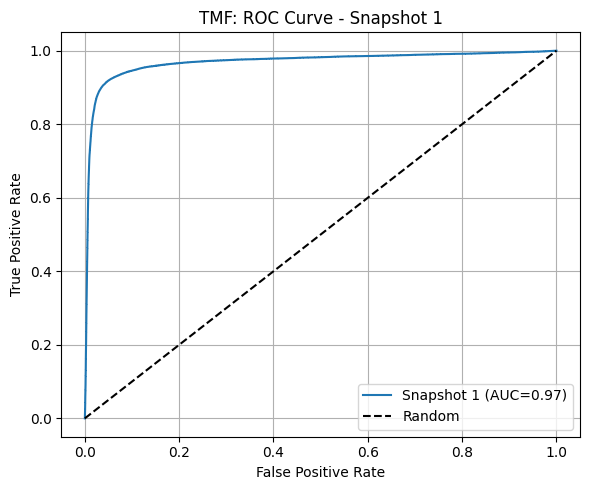

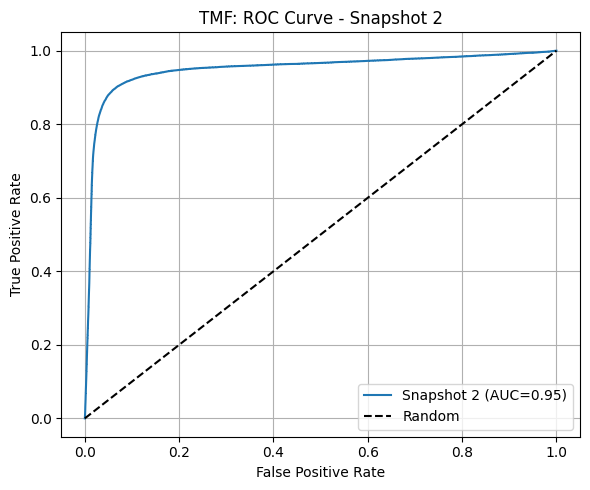

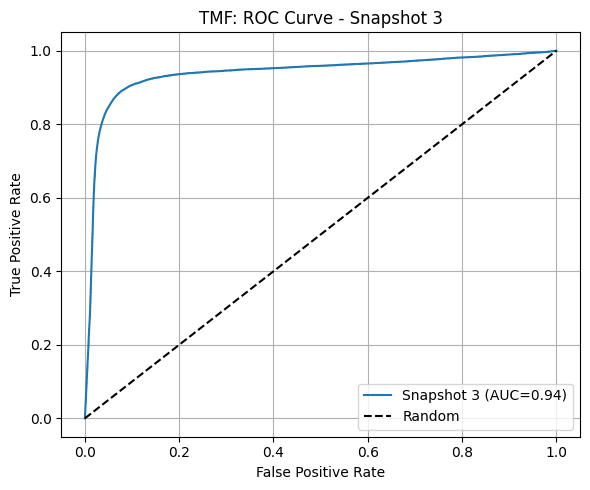

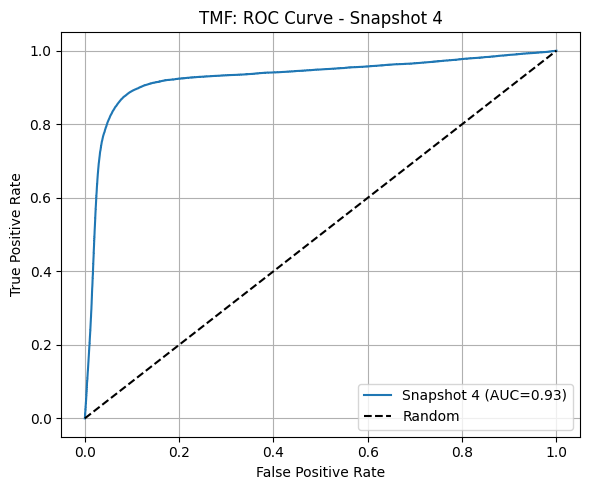

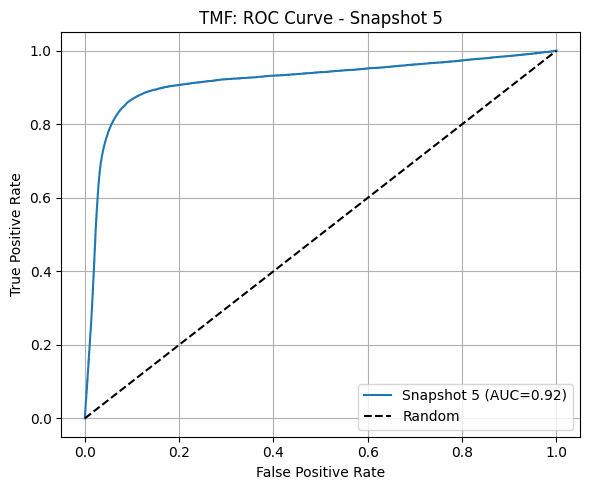

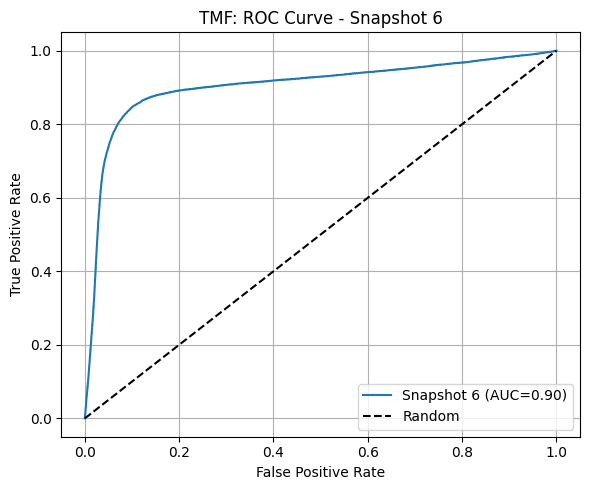

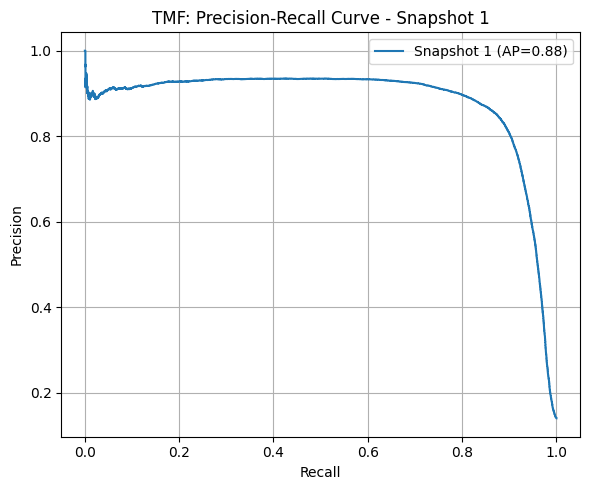

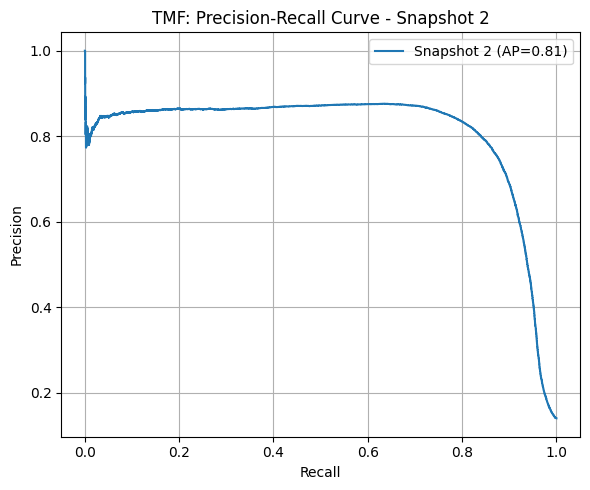

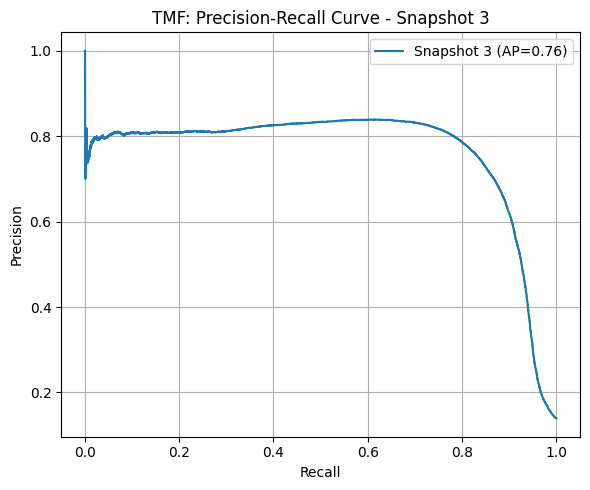

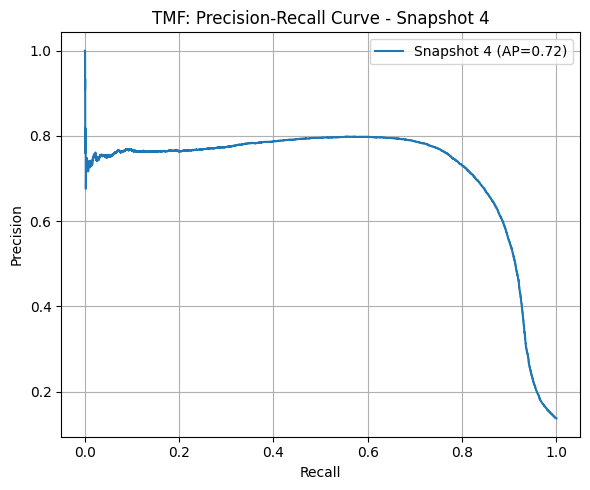

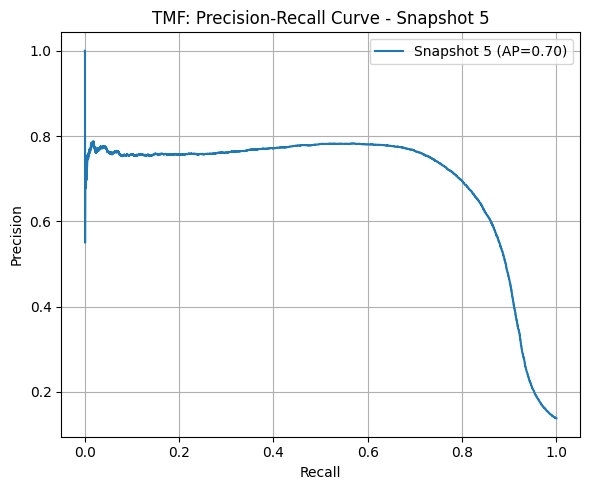

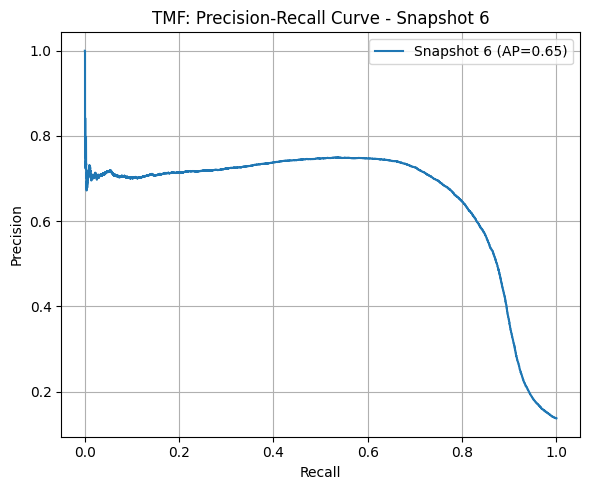

------------------------------------------------------------------


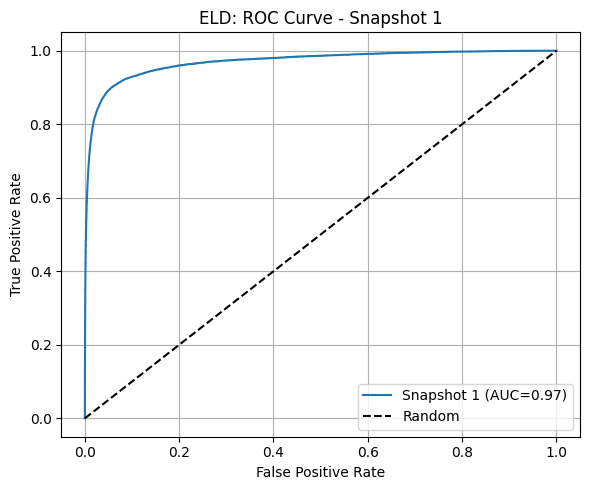

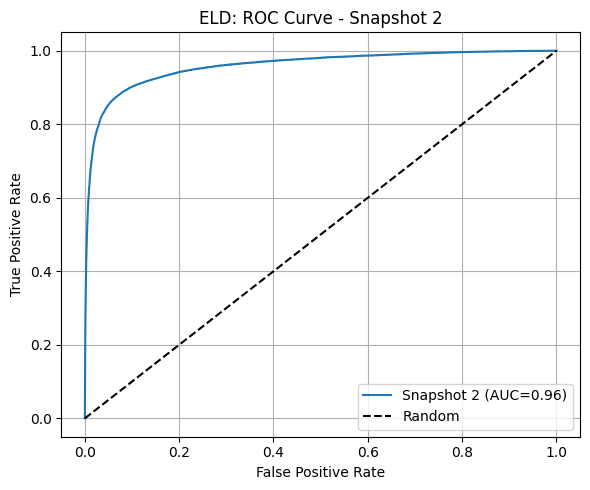

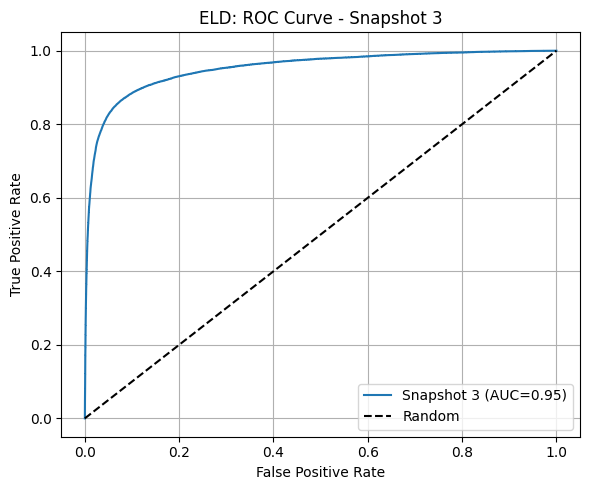

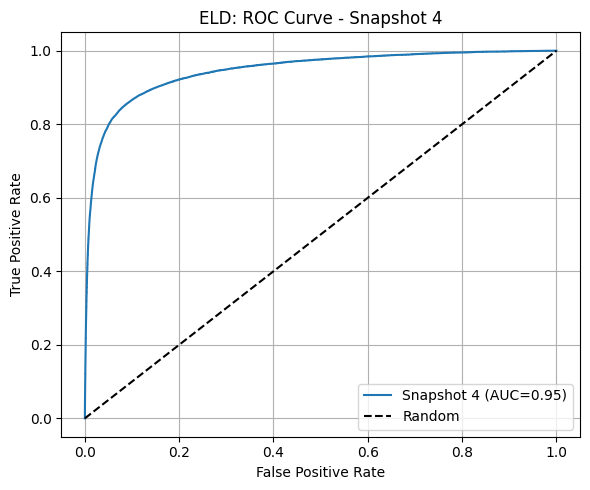

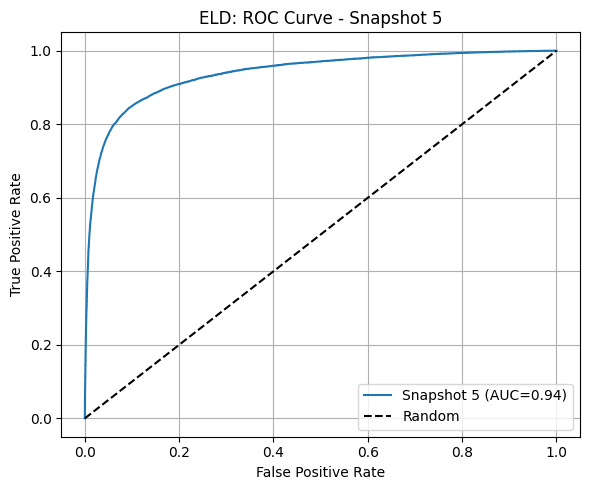

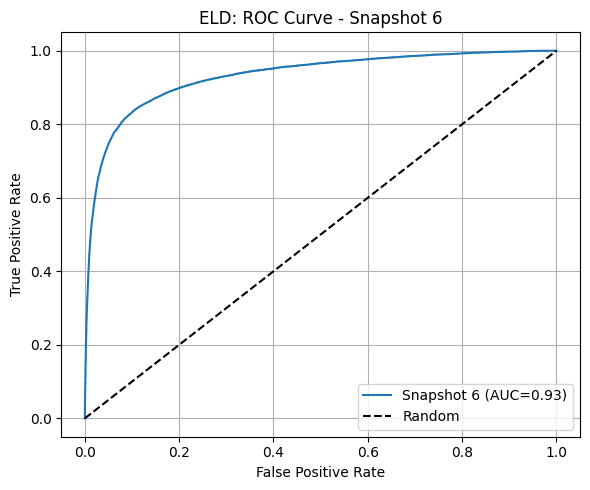

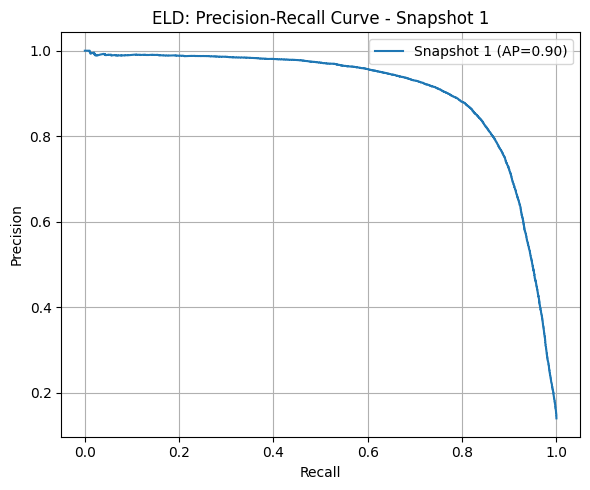

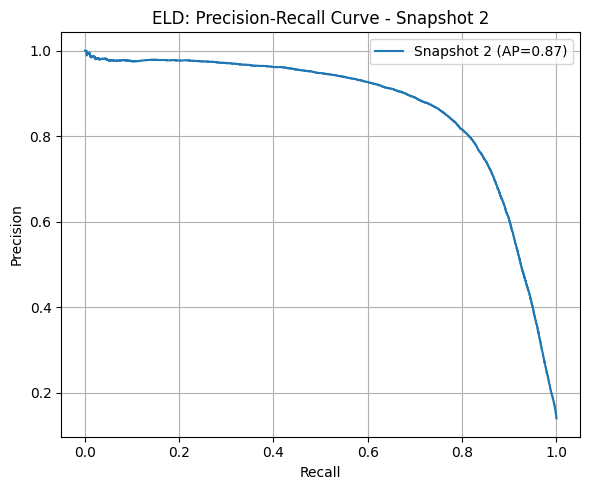

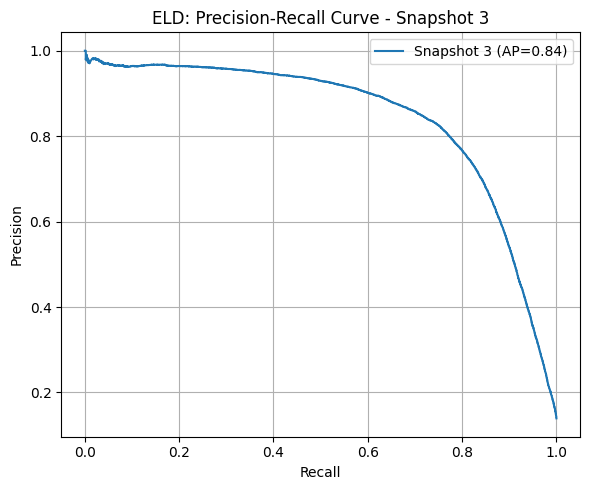

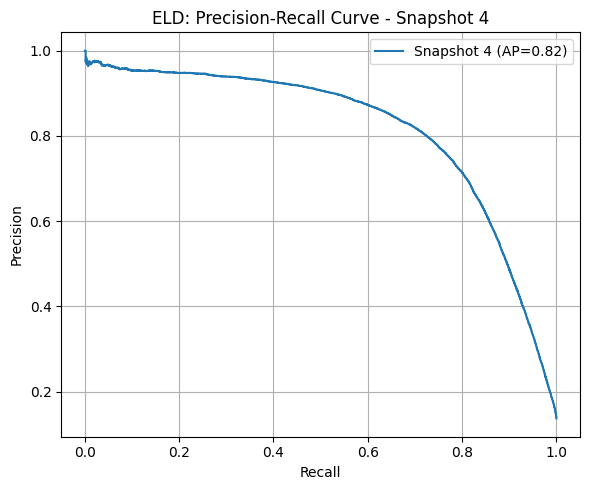

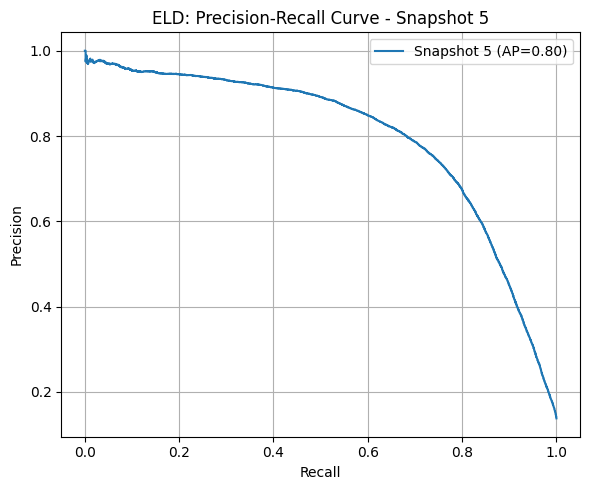

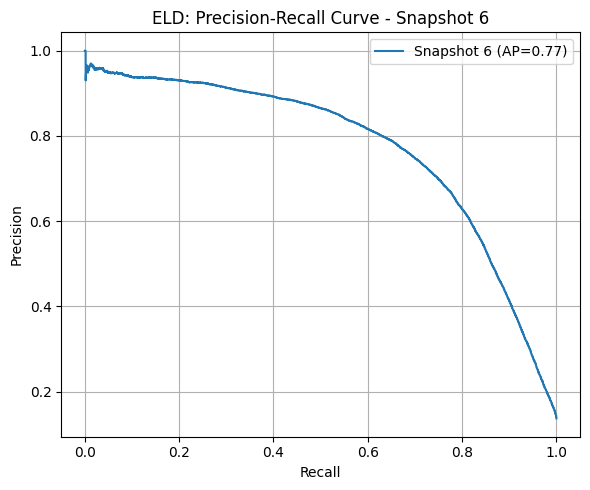

------------------------------------------------------------------


In [5]:
for model in modelos:
    plot_curves_from_model(model)
    print("------------------------------------------------------------------")

In [4]:
def parse_metrics_from_txt(filename):
    with open(filename, "r") as f:
        text = f.read()

    # Regex para cada snapshot
    snapshot_pattern = re.compile(
        r"Iterative .* Prediction on snapshot (\d+):\s+"
        r"C0 Prec: ([0-9.]+)\s+C0 Rec: ([0-9.]+)\s+C0 F1: ([0-9.]+)\s+"
        r"C1 Prec: ([0-9.]+)\s+C1 Rec: ([0-9.]+)\s+C1 F1: ([0-9.]+)\s+"
        r"RMSE: ([0-9.]+)\s+MAE: ([0-9.]+)\s+"
        r"Class 0 -> MAE: ([0-9.]+)\s+RMSE: ([0-9.]+)\s+"
        r"Class 1 -> MAE: ([0-9.]+)\s+RMSE: ([0-9.]+)",
        re.MULTILINE
    )

    snapshots = []
    c0_prec, c0_rec, c0_f1 = [], [], []
    c1_prec, c1_rec, c1_f1 = [], [], []
    rmse, mae = [], []
    c0_mae, c0_rmse = [], []
    c1_mae, c1_rmse = [], []

    for match in snapshot_pattern.finditer(text):
        snapshots.append(int(match.group(1)))
        c0_prec.append(float(match.group(2)))
        c0_rec.append(float(match.group(3)))
        c0_f1.append(float(match.group(4)))
        c1_prec.append(float(match.group(5)))
        c1_rec.append(float(match.group(6)))
        c1_f1.append(float(match.group(7)))
        rmse.append(float(match.group(8)))
        mae.append(float(match.group(9)))
        c0_mae.append(float(match.group(10)))
        c0_rmse.append(float(match.group(11)))
        c1_mae.append(float(match.group(12)))
        c1_rmse.append(float(match.group(13)))

    metrics = {
        "snapshots": snapshots,
        "c0_prec": c0_prec,
        "c0_rec": c0_rec,
        "c0_f1": c0_f1,
        "c1_prec": c1_prec,
        "c1_rec": c1_rec,
        "c1_f1": c1_f1,
        "rmse": rmse,
        "mae": mae,
        "c0_mae": c0_mae,
        "c0_rmse": c0_rmse,
        "c1_mae": c1_mae,
        "c1_rmse": c1_rmse,
    }

    return metrics


metrics = parse_metrics_from_txt("fc/eld_fc.txt")
print(metrics["snapshots"])
print(metrics["c1_prec"])


[22, 23, 24, 25, 26, 27]
[0.8509, 0.8144, 0.7815, 0.7491, 0.7338, 0.7094]


In [ ]:
def parse_and_plot_from(model):
    metrics = parse_metrics_from_txt(f"fc/{model}_fc.txt")
    plot_metric_comparison(model, metrics["c1_prec"], bs_c1_precision, 'Class1 Precision',bs_snapshots)
    plot_metric_comparison(model, metrics["c1_rec"], bs_c1_recall, 'Class1 Recall',bs_snapshots)
    plot_metric_comparison(model, metrics["c1_f1"], bs_c1_f1, 'Class1 F1',bs_snapshots)
    plot_metric_comparison(model, metrics["c0_prec"], bs_c0_precision, 'Class0 Precision',bs_snapshots)
    plot_metric_comparison(model, metrics["c0_rec"], bs_c0_recall, 'Class0 Recall',bs_snapshots)
    plot_metric_comparison(model, metrics["c0_f1"], bs_c0_f1, 'Class0 F1',bs_snapshots)
    plot_metric_comparison(model, metrics["c1_mae"], bs_c1_mae, 'Class1 MAE',bs_snapshots)
    plot_metric_comparison(model, metrics["c1_rmse"], bs_c1_rmse, 'Class1 RMSE',bs_snapshots)

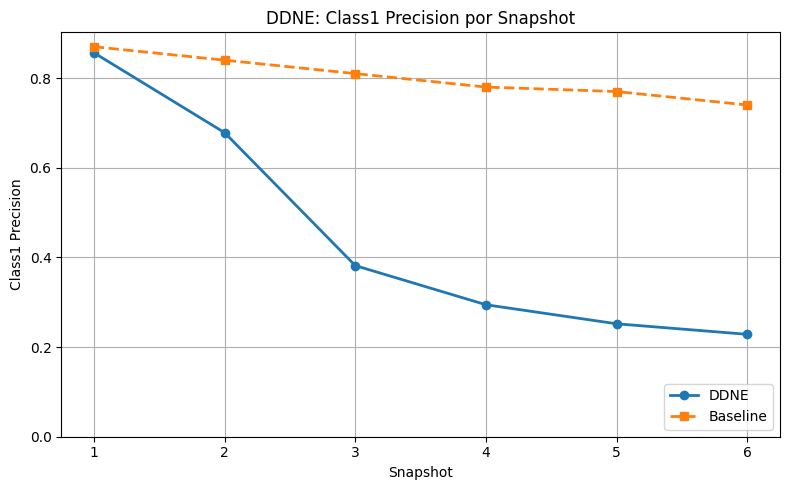

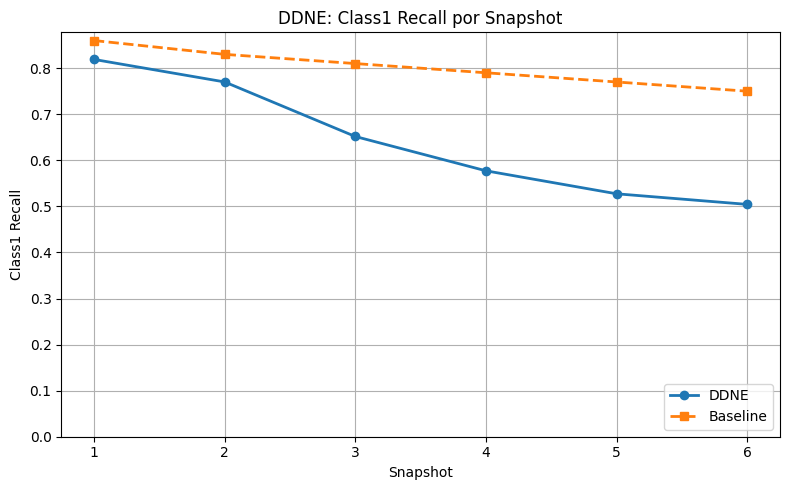

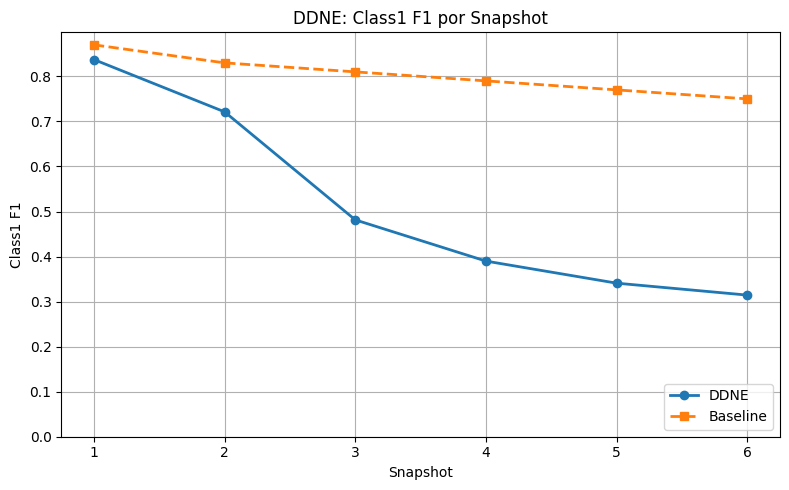

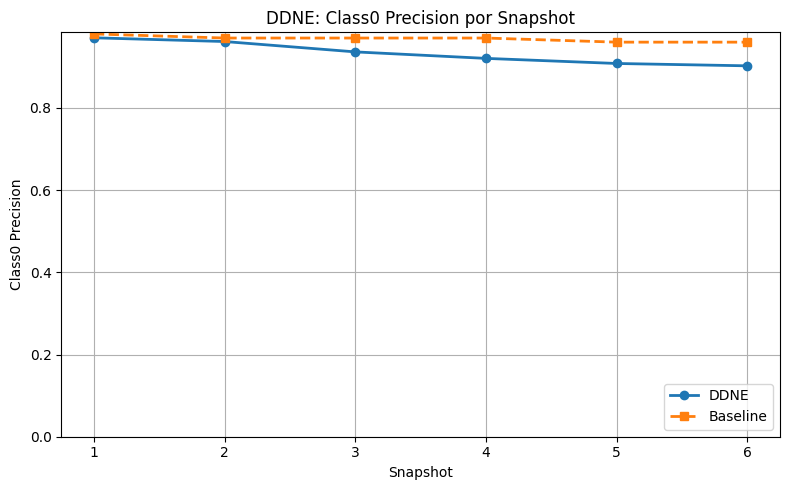

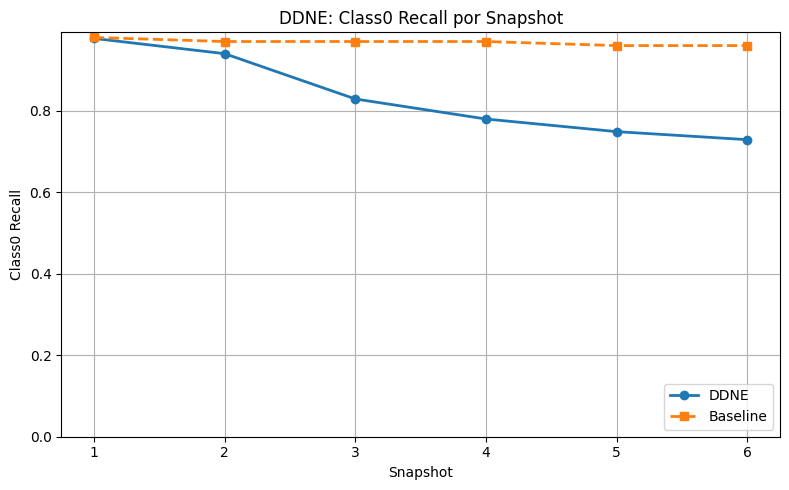

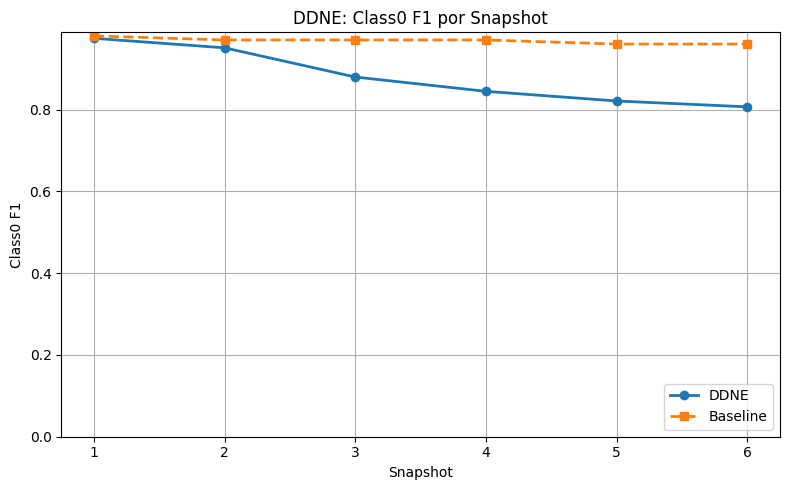

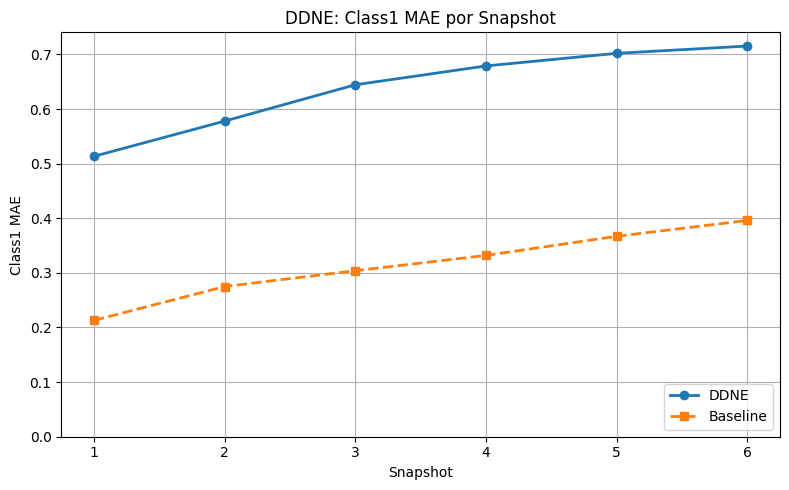

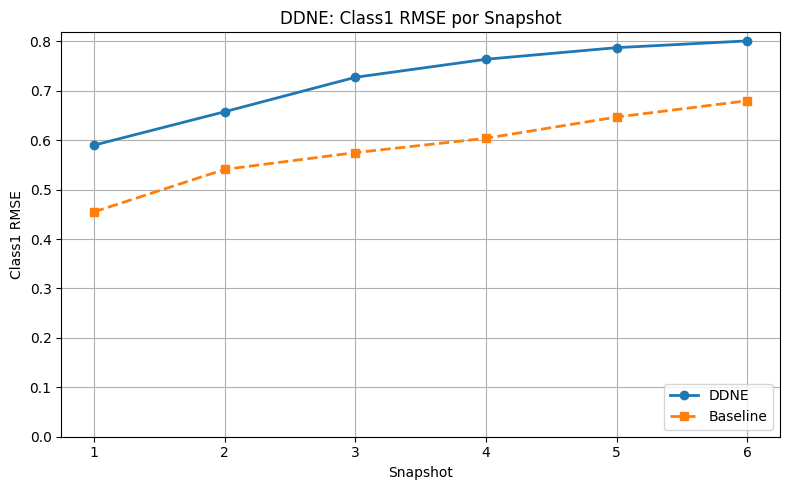

In [18]:
parse_and_plot_from('ddne')

In [45]:
##Esto no funciona bien para metricas de clasificacion
def plot_all_models(metric_key, baseline_values, metric_name, reg = False):
    plt.figure(figsize=(8, 5))

    for model in modelos:
        metrics = parse_metrics_from_txt(f"fc/{model}_fc.txt")
        plt.plot(
            bs_snapshots,
            metrics[metric_key],
            marker='o',
            linewidth=2,
            label=model.upper()
        )

    # baseline
    plt.plot(
        bs_snapshots,
        baseline_values,
        marker='s',
        linestyle='--',
        linewidth=2,
        label="Baseline"
    )

    plt.xlabel("Snapshot")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} por Snapshot")
    plt.grid(True)
    
    if reg:
        plt.ylim(top=1.5)
        plt.legend(loc='upper right')
    else:
        plt.legend(loc='lower left')
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()


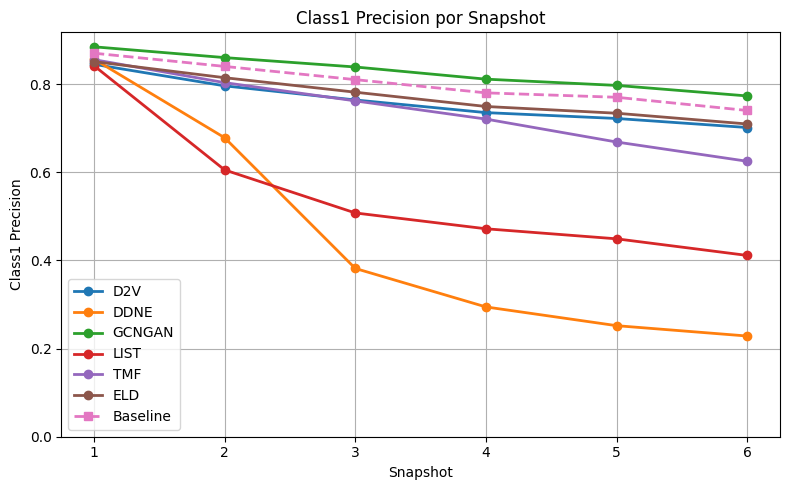

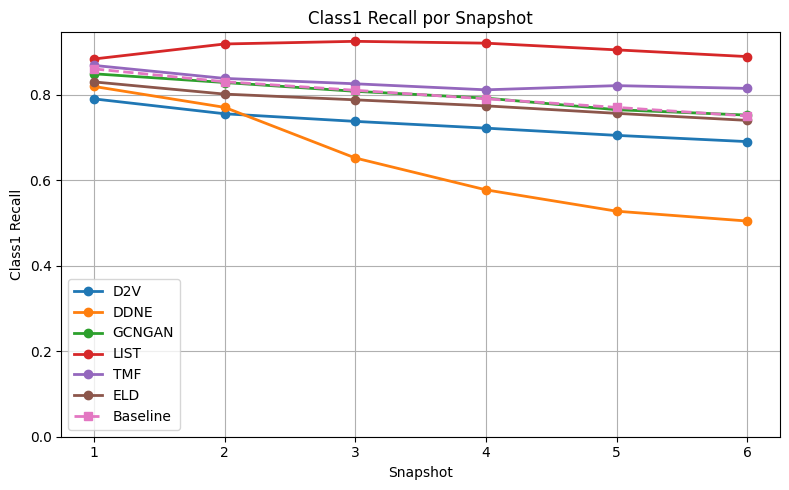

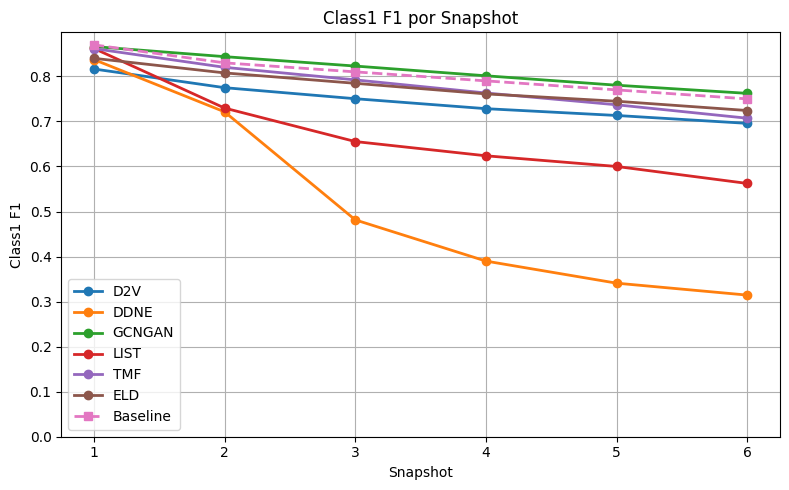

In [42]:
plot_all_models("c1_prec", bs_c1_precision, 'Class1 Precision')
plot_all_models("c1_rec", bs_c1_recall, 'Class1 Recall')
plot_all_models("c1_f1", bs_c1_f1, 'Class1 F1')


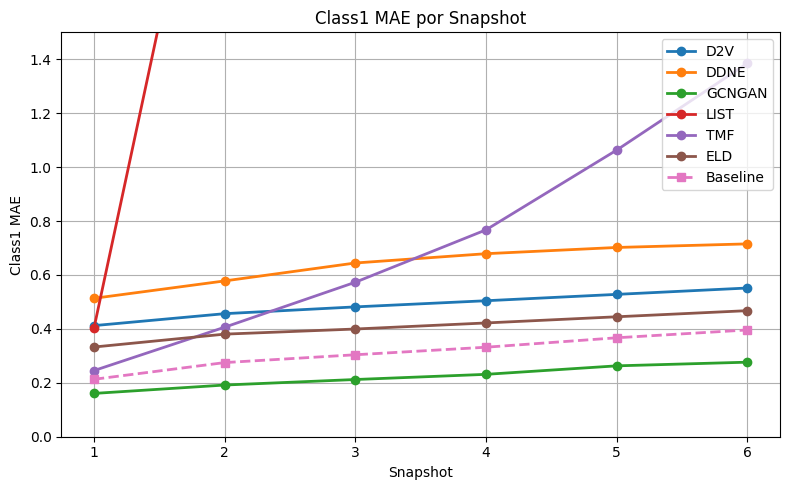

In [46]:
plot_all_models("c1_mae", bs_c1_mae, 'Class1 MAE', True)


In [15]:
import matplotlib.pyplot as plt

def barplot_metrics_all_models(modelos, bs_c1_precision, bs_c1_recall, bs_c1_f1, bs_c1_mae, bs_c1_rmse):
    # Diccionario de métricas a mostrar
    metric_keys = {
        "c1_prec": ("Class 1 Precision", bs_c1_precision),
        "c1_rec": ("Class 1 Recall", bs_c1_recall),
        "c1_f1": ("Class 1 F1", bs_c1_f1),
        "c1_mae": ("Class 1 MAE", bs_c1_mae),
        "c1_rmse": ("Class 1 RMSE", bs_c1_rmse),
    }

    for key, (title, baseline_array) in metric_keys.items():
        values = []
        labels = []

        # Recolectar valores de cada modelo (primer snapshot)
        for model in modelos:
            metrics = parse_metrics_from_txt(f"fc/{model}_fc.txt")
            values.append(metrics[key][0])  # primer snapshot
            labels.append(model.upper())

        # Agregar baseline (primer snapshot también)
        values.append(baseline_array[0])
        labels.append("BASELINE")

        # Plot
        fig, ax = plt.subplots(figsize=(8, 5))
        bars = ax.bar(labels, values, color="skyblue")

        # Anotar valores encima
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f"{height:.3f}",
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

        ax.set_title(f"{title} (Primer Snapshot)")
        ax.set_ylabel("Score")
        plt.ylim(0, max(values) * 1.15)
        plt.tight_layout()
        plt.show()


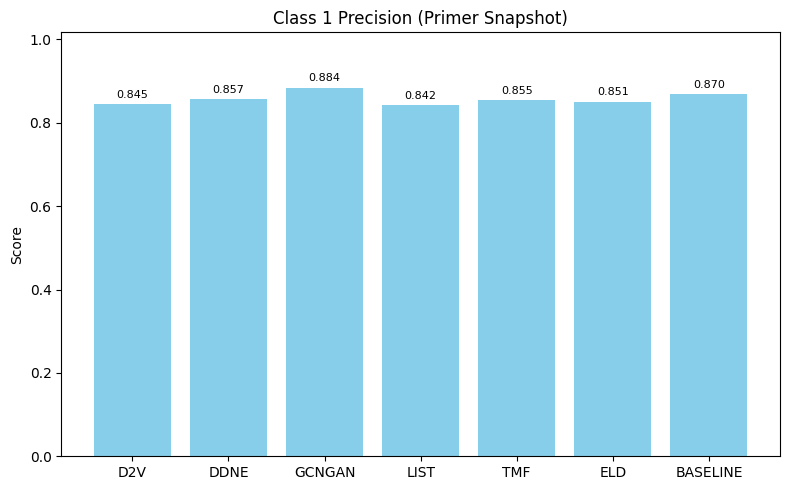

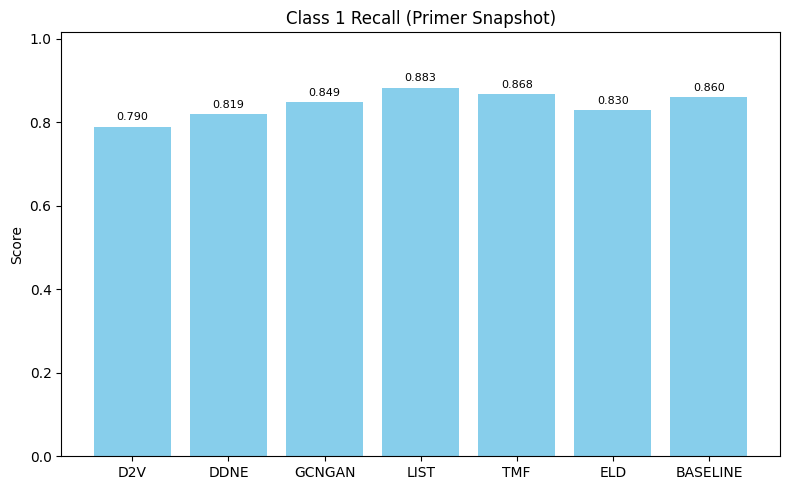

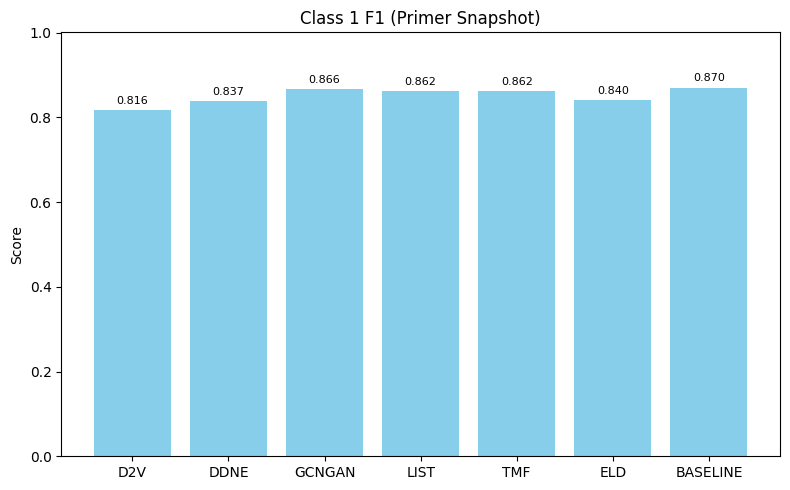

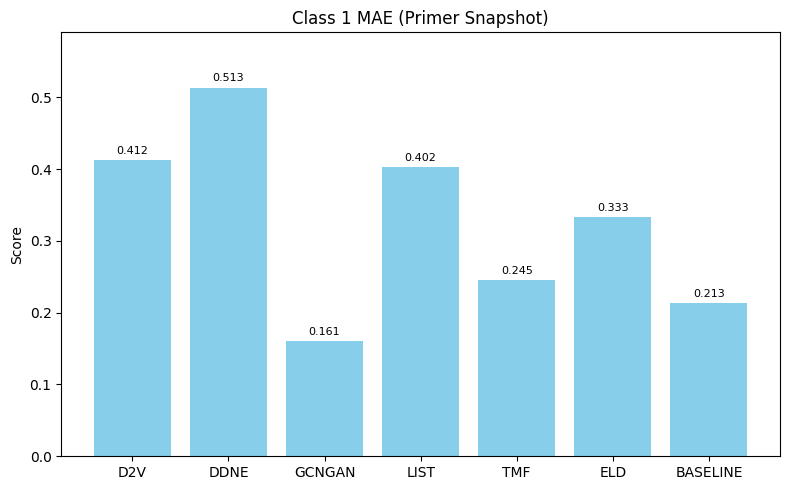

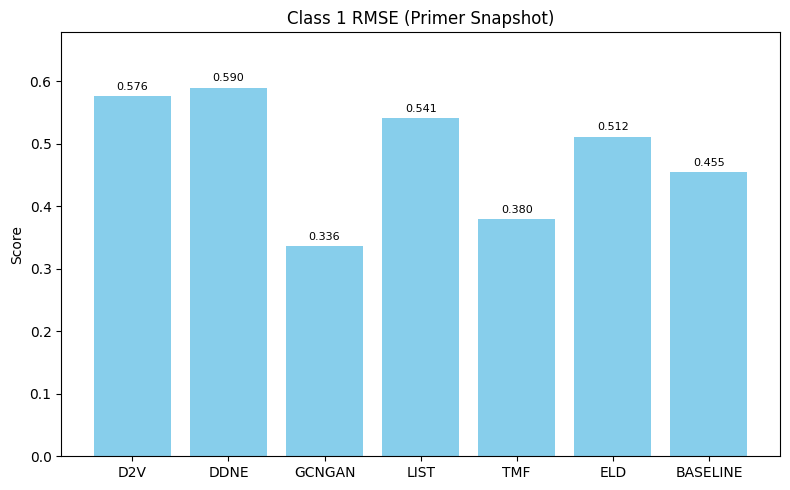

In [17]:
barplot_metrics_all_models(modelos, bs_c1_precision, bs_c1_recall, bs_c1_f1, bs_c1_mae,bs_c1_rmse)


Comparación a 10 años

In [19]:
#Scrap baseline results

with open("fc/bs10ys_fc.txt", "r") as f:
        text = f.read()
# --- Regex patterns ---
snap_pattern = re.compile(r"Snapshot (\d+): ROC AUC=([\d.]+), PR AUC=([\d.]+), Acc=([\d.]+), Prec=([\d.]+), Rec=([\d.]+), F1=([\d.]+)")
class0_pattern = re.compile(r"\n\s*0\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)")
class1_pattern = re.compile(r"\n\s*1\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)")
# regresión global
global_reg_pattern = re.compile(r"Global RMSE\s*:? ([\d.]+)\s*std:\s*([\d.]+)\s*Global MAE\s*:? ([\d.]+)\s*std:\s*([\d.]+)", re.I)

# regresión por clase
class0_reg_pattern = re.compile(
    r"RMSE clase 0\s*:\s*([\d.]+),\s*MAE clase 0\s*:\s*([\d.]+)", re.I)
class1_reg_pattern = re.compile(
    r"RMSE clase 1\s*:\s*([\d.]+),\s*MAE clase 1\s*:\s*([\d.]+)", re.I)

# --- Extract global snapshot metrics ---
bs10_snapshots   = []
bs10_roc_auc     = []
bs10_pr_auc      = []
bs10_accuracy    = []
bs10_precision   = []
bs10_recall      = []
bs10_f1_score    = []

# --- Extract class metrics ---
bs10_c0_precision = []
bs10_c0_recall    = []
bs10_c0_f1        = []
bs10_c1_precision = []
bs10_c1_recall    = []
bs10_c1_f1        = []
bs10_rmse       = []
bs10_rmse_std  = []
bs10_mae       = []
bs10_mae_std   = []
bs10_c0_rmse   = []
bs10_c0_mae    = []
bs10_c1_rmse   = []
bs10_c1_mae    = []


snap_matches = snap_pattern.findall(text)
class0_matches = class0_pattern.findall(text)
class1_matches = class1_pattern.findall(text)
global_reg     = global_reg_pattern.findall(text)
class0_reg     = class0_reg_pattern.findall(text)
class1_reg     = class1_reg_pattern.findall(text)


for i, m in enumerate(snap_matches):
    snap, roc, pr, acc, prec, rec, f1 = m
    bs10_snapshots.append(int(snap) - 17)  
    bs10_roc_auc.append(float(roc))
    bs10_pr_auc.append(float(pr))
    bs10_accuracy.append(float(acc))
    bs10_precision.append(float(prec))
    bs10_recall.append(float(rec))
    bs10_f1_score.append(float(f1))

    # Clases
    c0p, c0r, c0f = class0_matches[i]
    c1p, c1r, c1f = class1_matches[i]

    bs10_c0_precision.append(float(c0p))
    bs10_c0_recall.append(float(c0r))
    bs10_c0_f1.append(float(c0f))

    bs10_c1_precision.append(float(c1p))
    bs10_c1_recall.append(float(c1r))
    bs10_c1_f1.append(float(c1f))
    # Regresión global
    g_rmse, g_rmse_std, g_mae, g_mae_std = global_reg[i]
    bs10_rmse.append(float(g_rmse))
    bs10_rmse_std.append(float(g_rmse_std))
    bs10_mae.append(float(g_mae))
    bs10_mae_std.append(float(g_mae_std))

    # Regresión por clase
    c0_rmse, c0_mae_ = class0_reg[i]
    c1_rmse, c1_mae_ = class1_reg[i]
    bs10_c0_rmse.append(float(c0_rmse))
    bs10_c0_mae.append(float(c0_mae_))
    bs10_c1_rmse.append(float(c1_rmse))
    bs10_c1_mae.append(float(c1_mae_))




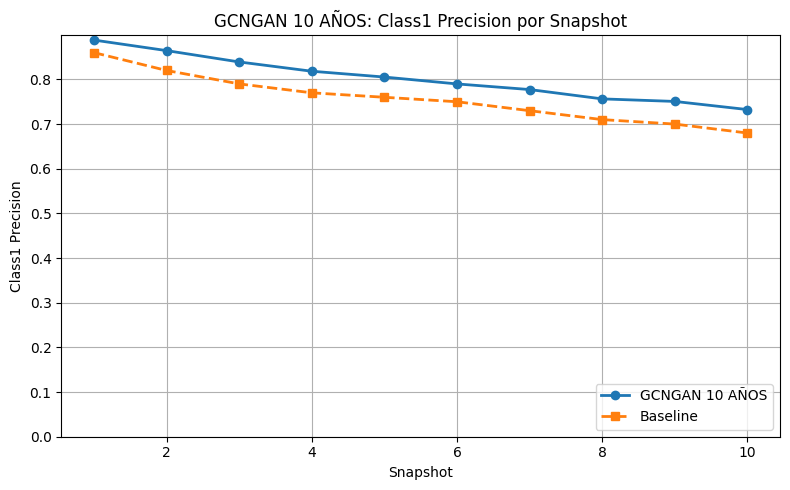

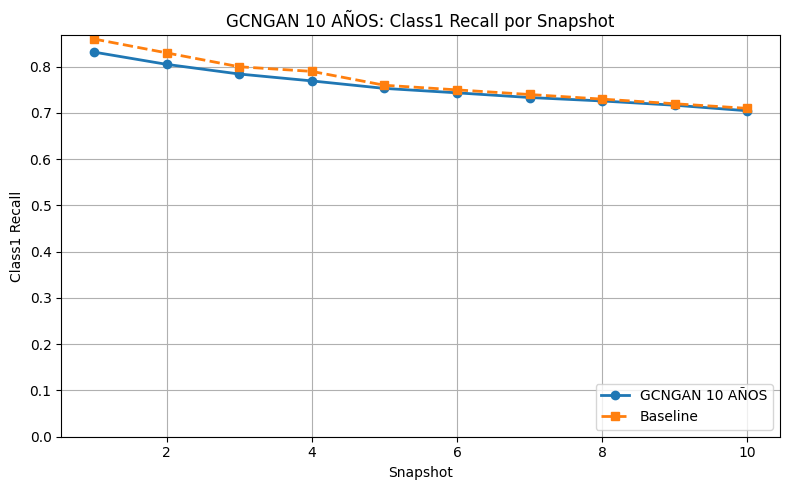

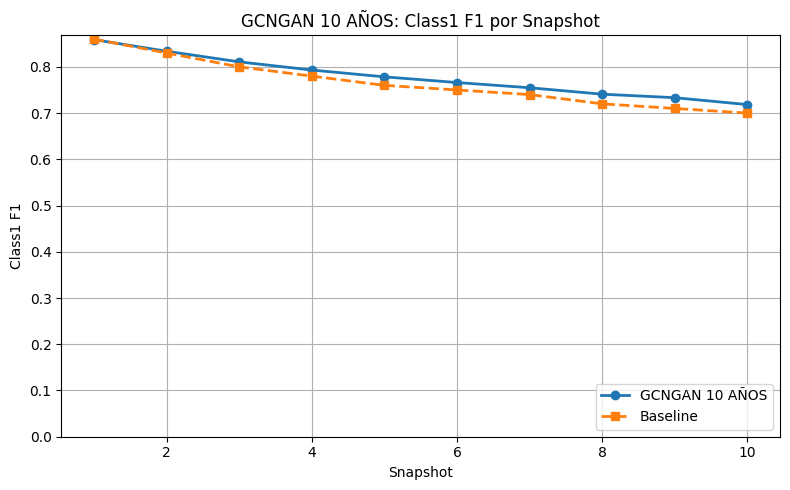

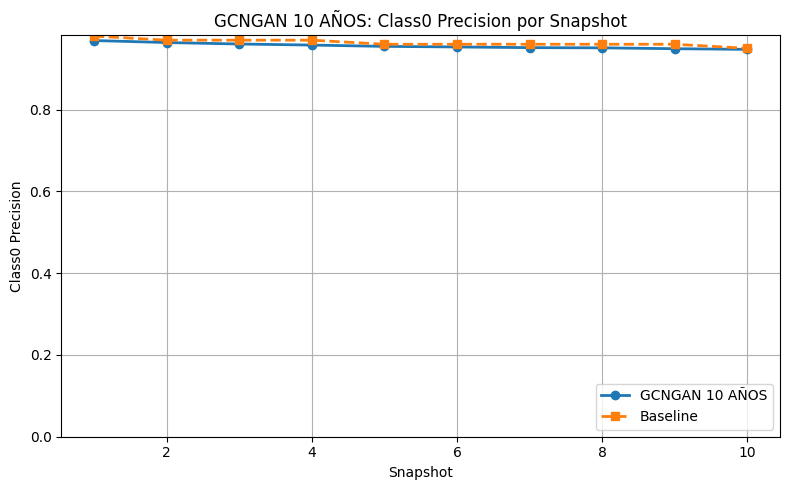

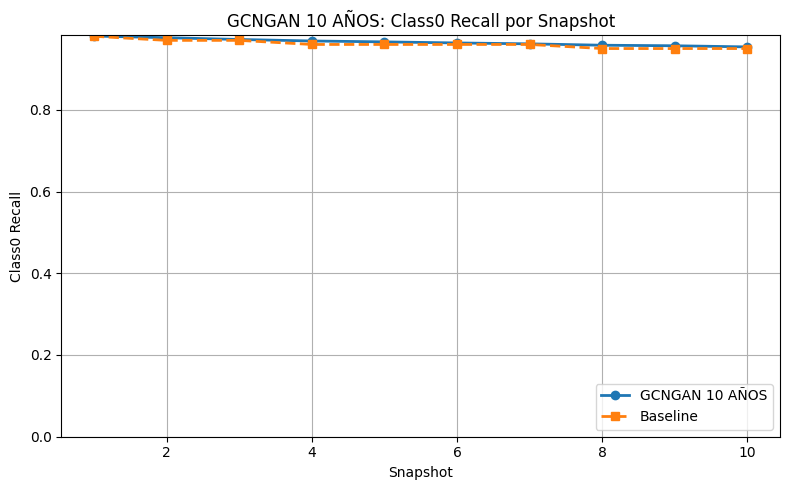

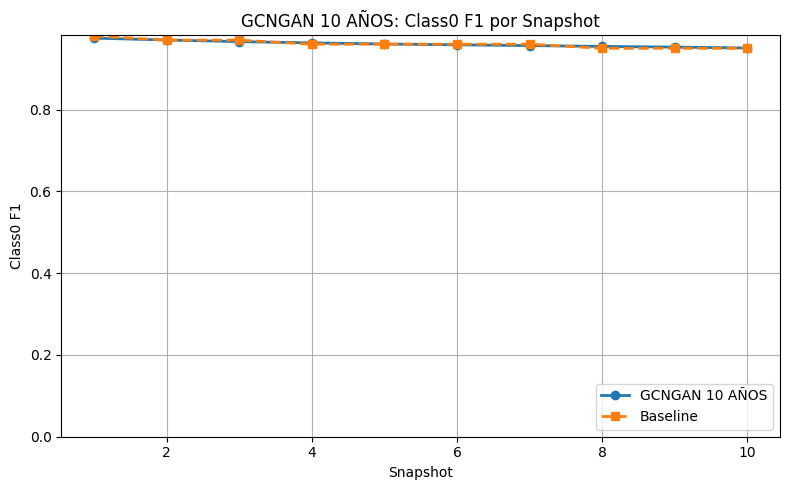

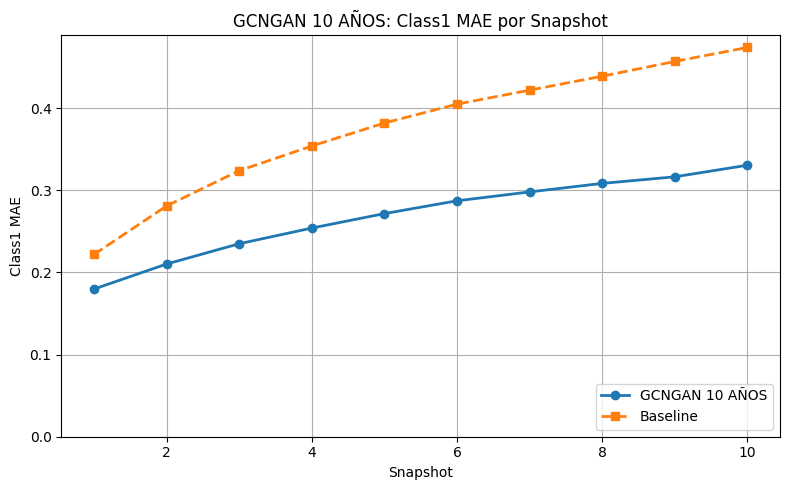

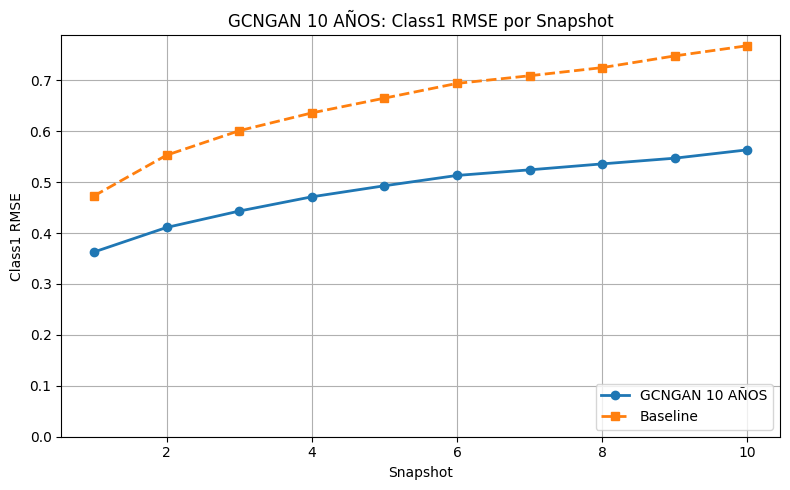

In [20]:
metrics = parse_metrics_from_txt("fc/gcngan10ys_fc.txt")
plot_metric_comparison('gcngan 10 años', metrics["c1_prec"], bs10_c1_precision, 'Class1 Precision',bs10_snapshots)
plot_metric_comparison('gcngan 10 años', metrics["c1_rec"], bs10_c1_recall, 'Class1 Recall',bs10_snapshots)
plot_metric_comparison('gcngan 10 años', metrics["c1_f1"], bs10_c1_f1, 'Class1 F1',bs10_snapshots)
plot_metric_comparison('gcngan 10 años', metrics["c0_prec"], bs10_c0_precision, 'Class0 Precision',bs10_snapshots)
plot_metric_comparison('gcngan 10 años', metrics["c0_rec"], bs10_c0_recall, 'Class0 Recall',bs10_snapshots)
plot_metric_comparison('gcngan 10 años', metrics["c0_f1"], bs10_c0_f1, 'Class0 F1',bs10_snapshots)
plot_metric_comparison('gcngan 10 años', metrics["c1_mae"], bs10_c1_mae, 'Class1 MAE',bs10_snapshots)
plot_metric_comparison('gcngan 10 años', metrics["c1_rmse"], bs10_c1_rmse, 'Class1 RMSE',bs10_snapshots)

In [3]:

filename = f"gcngan_fc_curve_metrics_from_year22.json"

with open(filename, "r") as f:
    metrics = json.load(f)  

# graficar roc curve por snapshot


precisions = metrics["precision_curve"]
recalls = metrics["recall_curve"]
avg_precs = metrics["average_precision"]

precs = precisions[0]
recs = recalls[0]




In [4]:
print(precs)

[0.15621247487081236, 0.15621458254627882, 0.15621669027862106, 0.15621879806784145, 0.15622090591394222, 0.15622301381692574, 0.15622512177679426, 0.15622722979355014, 0.15622933786719562, 0.15623144599773303, 0.15623355418516469, 0.15623566242949288, 0.15623777073071993, 0.1562398790888481, 0.15624198750387974, 0.15624409597581712, 0.15624620450466256, 0.15624831309041837, 0.15625042173308681, 0.15625253043267026, 0.15625463918917096, 0.15625674800259123, 0.1562588568729334, 0.15626096580019974, 0.15626307478439258, 0.15626518382551421, 0.15626729292356697, 0.1562694020785531, 0.15627151129047498, 0.15627362055933486, 0.15627572988513505, 0.15627783926787786, 0.15627994870756565, 0.15628205820420063, 0.1562841677577852, 0.1562862773683216, 0.15628838703581216, 0.1562904967602592, 0.156292606541665, 0.15629471638003187, 0.15629682627536212, 0.1562989362276581, 0.15630104623692204, 0.1563031563031563, 0.1563052664263632, 0.15630737660654498, 0.15630948684370402, 0.1563115971378426, 0.1